## **Module 3 Final Project**

    Title: Northwind Database
    Submitted By: RU KEÏN
    Date: December 5, 2019
    Instructor: James Irving PhD
    https://vimeo.com/rukein/northwind-datascience-project-presentation
    http://www.hakkeray.com/datascience/2019/12/07/thinking-outside-the-lego-box.html

---
## Summary

**PROJECT GOAL**
Recommend business strategies for increasing sales and reducing cost for the Northwind company. 

**DATABASE:**
This project is based on a fictitious business database created by Microsoft for the use of practicing SQL, hypothesis testing and other data analysis related projects. 

**OBJECTIVES**
1. Gather and Explore the data, observing possible relationships between features
2. Compose 4 hypotheses relating to the project goal  
3. Determine statistical significance
4. Analyze results with provide summary of conclusion
5. Provide strategic business insights
6. Recommend ideas for future work

--------------------------
## Questions

**H1: Discount and Order Quantity**

Does discount amount have a statistically significant effect on order quantity? If so, at what level(s) of discount?

**H2: Countries and Order Quantity: Discount vs Full Price**

Do order quantities of individual countries differ when discounted vs full price?

**H3: Region and Order Revenue**

Does region have a statistically significant effect on average revenue per order?

**H4: Month and Order Quantity**

Does time of year have a statistically significant effect on average revenue per order?

---
## Outline

Outline of process I will follow in order to answer questions above:

- Question
    1. Hypotheses
    2. Exploratory Data Analysis (EDA)
        - Select dataset
        - Group data
        - Explore data
    3. Assumption Tests:
        - Sample size
        - Normality and Variance
    4. Statistical Tests:
        - Statistical test
        - Effect size (if necessary)
        - Post-hoc tests (if necessary)
    5. Summarize Results

---

## Process

**Statistical Analysis Pipeline**
For #3 and #4 above (Assumption and Statistical Tests):

1. Check if sample sizes allow us to ignore assumptions by visualizing sample size comparisons for two groups (normality check).
    * Bar Plot: SEM (Standard Error of the Mean)

2. If above test fails, check for normality and homogeneity of variance:
    * Test Assumption Normality:
        - D'Agostino-Pearson: scipy.stats.normaltest
        - Shapiro-Wilik Test: scipy.stats.shapiro
    
    * Test for Homogeneity of Variance:
        - Levene's Test: scipy.stats.levene)
Parametric tests (means)	Nonparametric tests (medians)
1-sample t test	1-sample Sign, 1-sample Wilcoxon
2-sample t test	Mann-Whitney tes
One-Way ANOVA	Kruskal-Wallis, Mood’s median tes
Factorial DOE with one factor and one blocking variable	Friedman test
3. Choose appropriate test based on above
    * T Test (1-sample)
         - `stats.ttest_1samp()`
    * T Test (2-sample)
        - stats.ttest_ind()
    * Welch's T-Test (2-sample)
        - stats.ttest_ind(equal_var=False)
    * Mann Whitney U
        - stats.mannwhitneyu()
    * ANOVA
        - stats.f_oneway()

4. Calculate effect size for significant results.
    * Effect size: 
        - cohen's d

    -Interpretation:
    - Small effect = 0.2 ( cannot be seen by naked eye)
    - Medium effect = 0.5
    - Large Effect = 0.8 (can be seen by naked eye)


5. If significant, follow up with post-hoc tests (if have more than 2 groups)
    * Tukey's
        - statsmodels.stats.multicomp.pairwise_tukeyhsd

## Data

In [2]:
# install requisite libraries and packages
!pip install -U fsds_100719 --user
from fsds_100719.imports import *

from fsds_100719.ds import ihelp, reload
import fsds_100719 as fs

!pip install researchpy

#ignore pink warnings
import warnings
warnings.filterwarnings('ignore')

# Allow for large # columns
pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows',0)

# Styles: fonts, color and formatting
colormap = ('skyblue', 'salmon', 'lightgreen')

fsds_1007219  v0.6.2 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [3]:
# connect to database / import data
import sqlite3 
conn = sqlite3.connect('Northwind_small.sqlite')
cur = conn.cursor()

In [4]:
from IPython.display import HTML
HTML('<img src="https://github.com/hakkeray/dsc-mod-3-project-online-ds-ft-100719/blob/master/Northwind_ERD_updated.png?raw=true">')


In [5]:
# create dataframe of table names for referencing purposes
cur.execute("""SELECT name from sqlite_master WHERE type='table';""")
df_tables = pd.DataFrame(cur.fetchall(), columns=['Table'])
df_tables

,Table
0,Employee
1,Category
2,Customer
3,Shipper
4,Supplier
5,Order
6,Product
7,OrderDetail
8,CustomerCustomerDemo
9,CustomerDemographic


## Functions

In [6]:
# Import my Custom-built Functions (from Hakkeray)
#fs.ft.hakkeray.hot_stats()

In [7]:
# function for converting tables into dataframes on the fly
def get_table(cur, table):
    cur.execute(f"SELECT * from {table};")
    df = pd.DataFrame(cur.fetchall())
    df.columns = [desc[0] for desc in cur.description]
    return df

In [8]:
#### Cohen's d
def Cohen_d(group1, group2):
    # Compute Cohen's d.
    # group1: Series or NumPy array
    # group2: Series or NumPy array
    # returns a floating point number 
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

---
## W.H.I.P. (Hakkeray's Method)
`whip_it()`

`W.H.I.P. IT` 
* `W`HO-WHAT-WHERE-WHEN-WHY: build the landscape: topography/triangulation of data in time and space
* `H`OW: draw paths, intersections: measure and calculate target destination and best routes to get there
* `I`F: state hypotheses and run tests
* `P`: calculate p-values to accept or reject hypotheses

---

**`W`** --> Categorical/Ordinal Features in multi-Dimensional splits

        + WHAT = Product, ProdCategory
        + WHERE = Country, Region
        + WHEN = Month, Quarter
        + WHO = Customer, Employee, Shipper
   
---

**`H`** --> 3 Continuous/Numeric Features in 2-Dimensional splits

H = H-O-W: how **High**, how **Often**, how **Wide(spread)**.

        + COUNT = Frequency+Velocity: # occurring total, # occ in given time interval ('WHEN')
        + QUANTITY = Sum and Statistical Average (Mean)
        + MAGNITUDE = (#)Count x (*)Qty: Size and direction of Rate of change (the Target)

---

**`2W`** --> 2 Variables Identified as Most Important (re-examined Across 3-Dimensional canvas)
 
        + WHY = trends, patterns, overlaps within confidence intervals for w3 significant parameters
        + WHY = hypothesis explaining observations >> MODEL for testing + making predictions
---


### W3: What, Where, When

### What+How = Products

 + 1 WHAT = (Product, Category) + HOW ({Number, Quantity, Revenue} + {count, sum, average})
 + 2 WHERE = (Country, Region) + HOW ({Number, Quantity, Revenue} + {count, sum, average})
 + 3 WHEN = (Month, Quarter) + HOW ({Number, Quantity, Revenue} + {count, sum, average})
 '
* 1.1 PRODUCT: What is the distribution of product sales?
     * a. Individual: SUM: count, sum quantity (units), sum revenue (units X price)
     * b. Per Order (Avg Qty, Avg Qty, Avg Revenue)

* 1.2 CATEGORY: What is the distribution of product category sales?
    * a. SUM: count, quantity (units), revenue (units X price)
    * b. AVG Per Order: count, qty, rev
    
    
* Tables required: Order, OrderDetail, Product, Category

TODO: 
- get tables
- join tables
- calc revenue > add col
- label price tier > add col
- groupby product, category
- measure stats
- store stats to dataframe 

#### GET Tables

In [9]:
# Get Tables: Order, OrderDetail, Product, Category
df_order = get_table(cur, "'Order'")
df_orderDetail = get_table(cur, 'OrderDetail')
df_product = get_table(cur, 'Product')
df_category = get_table(cur, 'Category')

In [10]:
# display and inspect variables 
display(df_order.head())
display(df_orderDetail.head())
display(df_product.head())
display(df_category.head())

,OrderId,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"


#### JOIN Tables

In [11]:
### WHAT: PRODUCT ###
# 1: df_products: Category, Product, Quantity, UnitPrice, Revenue, Discount, 
# Select columns and Join tables to create 3 individual dataframes

cur.execute("""SELECT o.OrderId, od.ProductId, od.Quantity, od.UnitPrice, od.Discount,
                od.Quantity*od.UnitPrice*(1-Discount) as Net, od.Quantity*od.UnitPrice as Gross,
                p.ProductName, p.CategoryId, p.UnitsInStock, p.Discontinued, c.CategoryName
                FROM 'Order' o
                JOIN OrderDetail od 
                ON o.OrderId = od.OrderId
                JOIN Product p 
                ON od.ProductId = p.Id
                JOIN Category c
                ON p.CategoryId = c.Id;""")
df_products = pd.DataFrame(cur.fetchall())
df_products.columns = [i[0] for i in cur.description]
print(len(df_products))
df_products.head()

2155


,OrderId,ProductId,Quantity,UnitPrice,Discount,Net,Gross,ProductName,CategoryId,UnitsInStock,Discontinued,CategoryName
0,10248,11,12,14.0,0.0,168.0,168.0,Queso Cabrales,4,22,0,Dairy Products
1,10248,42,10,9.8,0.0,98.0,98.0,Singaporean Hokkien Fried Mee,5,26,1,Grains/Cereals
2,10248,72,5,34.8,0.0,174.0,174.0,Mozzarella di Giovanni,4,14,0,Dairy Products
3,10249,14,9,18.6,0.0,167.4,167.4,Tofu,7,35,0,Produce
4,10249,51,40,42.4,0.0,1696.0,1696.0,Manjimup Dried Apples,7,20,0,Produce


In [12]:
# get hotstats to inspect price distribution
fs.ft.hakkeray.hot_stats(df_products, 'UnitPrice', verbose=True)

-------->
HOT!STATS
<--------

UNITPRICE
Data Type: float64

count    2155.00
mean       26.22
std        29.83
min         2.00
25%        12.00
50%        18.40
75%        32.00
max       263.50
Name: UnitPrice, dtype: float64 

à-la-Mode: 
0    18.0
dtype: float64


No Nulls Found!

Non-Null Value Counts:
18.00     102
10.00      71
14.00      56
12.50      55
19.00      53
38.00      45
14.40      41
15.00      39
21.00      38
34.00      37
9.65       36
4.50       36
55.00      35
7.75       35
49.30      34
6.00       32
12.00      31
53.00      30
17.45      30
9.50       29
13.00      29
18.40      28
31.00      26
24.00      26
30.00      25
         ... 
17.00       8
4.80        8
15.60       8
210.80      8
24.80       7
7.20        7
50.00       6
7.60        6
21.35       6
17.60       6
16.25       6
5.60        5
64.80       5
97.00       4
13.60       4
12.75       4
10.60       4
22.80       3
26.00       3
20.80       3
25.60       3
12.40       2
10.20       2
77.6

In [18]:
# create label for price tier > add col

df_products['price_tier'] = df_products['UnitPrice'].map(lambda x: 'low' if x < 15 else ('mid' if x < 30 else 'high'))
df_products['price_tier'].value_counts()

low     780
mid     728
high    647
Name: price_tier, dtype: int64

In [28]:
df_products.groupby(df_products['price_tier'])['Quantity'].describe()

,count,mean,std,min,25%,50%,75%,max
price_tier,,,,,,,,
high,647.0,24.302937,19.889347,1.0,10.0,20.0,30.0,130.0
low,780.0,23.692308,18.605842,1.0,10.0,20.0,30.0,120.0
mid,728.0,23.506868,18.689675,1.0,10.0,20.0,30.0,130.0


In [31]:
df_products.groupby(df_products['price_tier'])['Net'].describe()

,count,mean,std,min,25%,50%,75%,max
price_tier,,,,,,,,
high,647.0,1199.292757,1542.529787,28.5,425.74,782.0,1375.000,15810.0
low,780.0,215.325872,191.840468,4.8,75.00,157.5,292.875,1440.0
mid,728.0,442.165447,355.955923,17.0,189.75,360.0,572.400,2565.0


In [40]:
gross = df_products.groupby(df_products['price_tier'])['Gross'].describe()
print(gross)

            count         mean          std   min      25%     50%      75%      max
price_tier                                                                          
high        647.0  1279.648532  1646.673535  30.0  453.000  831.25  1492.74  15810.0
low         780.0   230.655449   208.419648   4.8   77.875  166.60   310.00   1440.0
mid         728.0   476.119148   395.621735  17.0  201.200  380.00   622.05   3420.0


In [47]:
import researchpy as rp
rp.summary_cont(df_products['UnitPrice'].groupby(df_products['CategoryName']))

,N,Mean,SD,SE,95% Conf.,Interval
CategoryName,,,,,,
Beverages,404,29.236757,55.596543,2.766031,23.808614,34.664901
Condiments,216,21.320833,9.239453,0.628665,20.085787,22.555879
Confections,334,22.602695,17.905647,0.979753,20.679497,24.525893
Dairy Products,366,26.983060,14.407963,0.753116,25.504931,28.461189
Grains/Cereals,196,21.246429,11.461189,0.818656,19.637753,22.855104
Meat/Poultry,173,42.874740,38.617256,2.936016,37.103445,48.646035
Produce,136,35.194485,14.079622,1.207318,32.819395,37.569576
Seafood,330,19.062970,14.248382,0.784348,17.523314,20.602626


In [48]:
# fig = plt.figure(figsize=(10,8))
# ax = fig.gca(title="Distribution of Price Levels")

# sns.distplot(df_products.groupby(df_products['price_tier'])['Gross'])
# ax.legend(['price_tier'])

In [87]:
cat_pricing = df_products['UnitPrice'].groupby(df_products['CategoryId'])
cat_pricing.describe()

,count,mean,std,min,25%,50%,75%,max
CategoryId,,,,,,,,
1,404.0,29.236757,55.596543,3.6,11.20,15.00,18.00,263.50
2,216.0,21.320833,9.239453,8.0,13.60,19.45,25.00,43.90
3,334.0,22.602695,17.905647,7.3,10.00,14.00,31.23,81.00
4,366.0,26.983060,14.407963,2.0,16.80,27.80,34.80,55.00
5,196.0,21.246429,11.461189,5.6,9.60,19.50,33.25,38.00
6,173.0,42.874740,38.617256,5.9,19.20,31.20,39.00,123.79
7,136.0,35.194485,14.079622,8.0,23.25,36.40,45.60,53.00
8,330.0,19.062970,14.248382,4.8,9.65,15.00,24.80,62.50


In [49]:
# groupby product, category, pricing, measure summary stats, store to dataframe

df_products.groupby(df_products['CategoryName'])['price_tier'].describe()

,count,unique,top,freq
CategoryName,,,,
Beverages,404,3,low,178
Condiments,216,3,mid,130
Confections,334,3,low,172
Dairy Products,366,3,high,160
Grains/Cereals,196,3,low,79
Meat/Poultry,173,3,high,92
Produce,136,3,high,97
Seafood,330,3,low,162


In [ ]:
# visually inspect differences in mean and StDev of distributions
sns.set_style("whitegrid")
%config InlineBackend.figure_format='retina'
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

ax.axvline(fullprice.mean(), color='blue', lw=2, ls='--', label='FP Avg')
ax.axvline(discount.mean(), color='orange', lw=2, ls='--', label='DC Avg')

fdict = {'fontfamily': 'PT Mono','fontsize': 16}

sns.distplot(fullprice, ax=ax, hist=True, kde=True, color='blue')
sns.distplot(discount, ax=ax, hist=True, kde=True, color='orange')
ax.legend(['Full Price', 'Discount'])
ax.set_title("Distribution of Full Price vs Discount Order Quantity", fontdict=fdict)

In [ ]:
#results compared above/below each other use .apply()
researchpy.summary_cont(df['healthy'].groupby(df['tx']))
researchpy.summary_cont(df.groupby(['tx', 'dose'])['healthy', 'non-healthy'])
df.groupby(['tx', 'dose'])['healthy', 'non-healthy'].apply(researchpy.summary_cont)

In [54]:
# Can handle multiple Series, although the output is not pretty
rp.summary_cat(df_products[['CategoryName', 'price_tier']])

,Variable,Outcome,Count,Percent
0,CategoryName,Beverages,404,18.75
1,,Dairy Products,366,16.98
2,,Confections,334,15.50
3,,Seafood,330,15.31
4,,Condiments,216,10.02
5,,Grains/Cereals,196,9.10
6,,Meat/Poultry,173,8.03
7,,Produce,136,6.31
8,price_tier,low,780,36.19
9,,mid,728,33.78


In [62]:
rp.summary_cont(df_products.groupby(['CategoryName', 'price_tier'])['Quantity', 'Gross'])

Quantity                                             ...        Gross                                                   
                                 N       Mean         SD        SE  95% Conf.  ...         Mean           SD          SE    95% Conf.     Interval
CategoryName   price_tier                                                      ...                                                                
Beverages      high             52  23.134615  15.726871  2.180925  18.860003  ...  3366.603846  4028.124899  558.600418  2271.747027  4461.460665
               low             178  24.348315  19.550948  1.465406  21.476120  ...   234.204213   231.162087   17.326331   200.244605   268.163822
               mid             174  22.959770  19.893171  1.508097  20.003899  ...   401.006897   354.503737   26.874859   348.332173   453.681620
Condiments     high             30  27.233333  20.547142  3.751378  19.880633  ...  1048.543333   698.638536  127.553362   798.538744  1298.547923
               low              56  23.285714  17.429040  2.329053  18.720770  ...   272.339286   214.417292   28.652716   216.179963   328.498609
               mid             130  24.438462  20.593144  1.806138  20.898431  ...   515.288077   470.694255   41.282617   434.374147   596.202006
Confections    high             93  23.666667  19.073846  1.977866  19.790050  ...  1101.466667   927.826290   96.211104   912.892902  1290.040431
               low             172  23.168605  16.888369  1.287726  20.644662  ...   244.528198   186.994494   14.258196   216.582133   272.474263
               mid              69  24.927536  15.746446  1.895649  21.212064  ...   472.519565   323.499865   38.944807   396.187743   548.851387
Dairy Products high            160  26.050000  20.901326  1.652395  22.811306  ...  1057.785000   928.161445   73.377605   913.964894  1201.605106
               low              84  25.761905  17.128585  1.868882  22.098896  ...   214.928571   211.210826   23.044990   169.760390   260.096753
               mid             122  23.090164  16.883658  1.528575  20.094158  ...   524.843443   407.318915   36.876922   452.564676   597.122209
Grains/Cereals high             70  25.185714  19.921071  2.381023  20.518908  ...   882.088571   697.628214   83.382520   718.658832  1045.518311
               low              79  22.493671  19.155821  2.155198  18.269482  ...   222.232911   217.418503   24.461493   174.288386   270.177437
               mid              47  21.744681  13.638928  1.989442  17.845374  ...   455.834043   314.450000   45.867247   365.934239   545.733846
Meat/Poultry   high             92  24.043478  21.710844  2.263512  19.606995  ...  1575.391304  1758.230953  183.308249  1216.107137  1934.675471
               low              36  20.972222  17.053673  2.842279  15.401356  ...   142.250000   115.556548   19.259425   104.501528   179.998472
               mid              45  27.377778  26.612786  3.967200  19.602066  ...   625.151111   557.806034   83.152814   462.171596   788.130626
Produce        high             97  22.865979  20.059094  2.036692  18.874062  ...   952.249485   886.171889   89.977123   775.894324  1128.604646
               low              13  22.846154  11.915299  3.304709  16.368923  ...   197.384615    99.459823   27.585192   143.317640   251.451591
               mid              26  18.269231  14.668491  2.876728  12.630845  ...   397.476923   330.645410   64.844900   270.380919   524.572927
Seafood        high             53  21.547170  18.259419  2.508124  16.631247  ...   956.235849   753.940409  103.561680   753.254957  1159.216741
               low             162  23.851852  20.969431  1.647514  20.622724  ...   232.195370   214.992181   16.891381   199.088264   265.302477
               mid             115  23.260870  16.873673  1.573478  20.176853  ...   463.712522   332.895706   31.042685   402.868860   524.556184

[24 rows x 12 columns]

In [43]:
# Create 2-3 groups based on price range categories: low, med, high
# setosa = df[(df['species'] == 'Iris-setosa')]
# setosa.reset_index(inplace= True)

# versicolor = df[(df['species'] == 'Iris-versicolor')]
# versicolor.reset_index(inplace= True)

low = df_products[(df_products['price_tier'] == 'low')]
low.reset_index(inplace= True)

mid = df_products[(df_products['price_tier'] == 'mid')]
mid.reset_index(inplace= True)

high = df_products[(df_products['price_tier'] == 'high')]
high.reset_index(inplace= True)

In [45]:
# g = sns.PairGrid(df_products, hue="price_tier")
# g.map_diag(plt.hist)
# g.map_offdiag(plt.scatter)
# g.add_legend();

In [ ]:
# Can pass the entire DataFrame or multiple Series

researchpy.correlation.corr_pair(df)

In [76]:
### WHERE ###
# 2: df_geo

# Select columns, join tables, create dataframe
cur.execute("""SELECT o.OrderId, o.ShipName, o.ShipAddress, o.ShipCity, o.ShipRegion, o.ShipPostalCode, 
                o.ShipCountry, od.ProductId, od.Quantity, od.UnitPrice, od.Discount,
                od.Quantity*od.UnitPrice*(1-Discount) as Net, od.Quantity*od.UnitPrice as Gross,
                p.ProductName, p.SupplierId, p.CategoryId, c.CategoryName
                FROM 'Order' o
                JOIN OrderDetail od 
                ON o.OrderId = od.OrderId
                JOIN Product p 
                ON od.ProductId = p.Id
                JOIN Category c
                ON p.CategoryId = c.Id;""")
df_geo = pd.DataFrame(cur.fetchall())
df_geo.columns = [i[0] for i in cur.description]
print(len(df_geo))
df_geo.head()

2155


,OrderId,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,ProductId,Quantity,UnitPrice,Discount,Net,Gross,ProductName,CategoryId,CategoryName
0,10248,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,11,12,14.0,0.0,168.0,168.0,Queso Cabrales,4,Dairy Products
1,10248,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,42,10,9.8,0.0,98.0,98.0,Singaporean Hokkien Fried Mee,5,Grains/Cereals
2,10248,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,72,5,34.8,0.0,174.0,174.0,Mozzarella di Giovanni,4,Dairy Products
3,10249,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany,14,9,18.6,0.0,167.4,167.4,Tofu,7,Produce
4,10249,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany,51,40,42.4,0.0,1696.0,1696.0,Manjimup Dried Apples,7,Produce


In [ ]:
sns.factorplot(data=df, x="model_year", y="mpg")

sns.factorplot(data=df, x="model_year", y="mpg", col="origin")



g = sns.FacetGrid(df, col="origin") 
g.map(sns.distplot, "mpg")


g = sns.FacetGrid(df, col="origin") 
g.map(plt.scatter, "horsepower", "mpg")

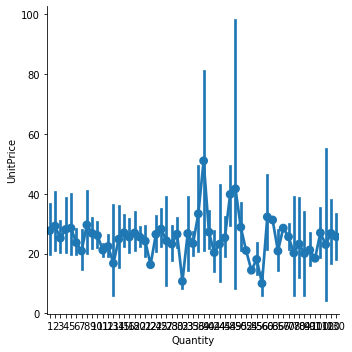

In [64]:
sns.factorplot(data=df_products, x="Quantity", y="UnitPrice")

In [ ]:
#  segment by multiple variables at once to compare conditional distributions across interacting segmentations:

df['tons'] = (df.weight/2000).astype(int) 
g = sns.FacetGrid(df, col="origin", row="tons") 
g.map(sns.kdeplot, "horsepower", "mpg") 
plt.xlim(0, 250) 
plt.ylim(0, 60)

In [78]:
### WHEN ###
# 3: df_time

# Select columns and Join tables:
# Category: CategoryName
cur.execute("""SELECT o.OrderId, o.OrderDate, o.RequiredDate, o.ShippedDate,
                od.ProductId, od.Quantity, od.UnitPrice, od.Discount,
                od.Quantity*od.UnitPrice*(1-Discount) as Net, 
                od.Quantity*od.UnitPrice as Gross,
                p.ProductName, p.SupplierId, p.CategoryId, c.CategoryName
                FROM 'Order' o
                JOIN OrderDetail od 
                ON o.OrderId = od.OrderId
                JOIN Product p 
                ON od.ProductId = p.Id
                JOIN Category c
                ON p.CategoryId = c.Id;""")
df_time = pd.DataFrame(cur.fetchall())
df_time.columns = [i[0] for i in cur.description]
print(len(df_time))
df_time.head()

2155


,OrderId,OrderDate,RequiredDate,ShippedDate,ProductId,Quantity,UnitPrice,Discount,Net,Gross,ProductName,SupplierId,CategoryId,CategoryName
0,10248,2012-07-04,2012-08-01,2012-07-16,11,12,14.0,0.0,168.0,168.0,Queso Cabrales,5,4,Dairy Products
1,10248,2012-07-04,2012-08-01,2012-07-16,42,10,9.8,0.0,98.0,98.0,Singaporean Hokkien Fried Mee,20,5,Grains/Cereals
2,10248,2012-07-04,2012-08-01,2012-07-16,72,5,34.8,0.0,174.0,174.0,Mozzarella di Giovanni,14,4,Dairy Products
3,10249,2012-07-05,2012-08-16,2012-07-10,14,9,18.6,0.0,167.4,167.4,Tofu,6,7,Produce
4,10249,2012-07-05,2012-08-16,2012-07-10,51,40,42.4,0.0,1696.0,1696.0,Manjimup Dried Apples,24,7,Produce


In [ ]:
g = sns.pairplot(df[["mpg", "horsepower", "weight", "origin"]], hue="origin", diag_kind="hist")
 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)

In [ ]:
# Visualize original data alongside residual plots

g = sns.PairGrid(df[["mpg", "horsepower", "weight", "origin"]], hue="origin") 
g.map_upper(sns.regplot) 
g.map_lower(sns.residplot) 
g.map_diag(plt.hist) 
for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45) 
g.add_legend() 
g.set(alpha=0.5)

In [ ]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

with sns.axes_style("dark"):
    g = sns.FacetGrid(tips, hue="time", col="time", height=4)
g.map(hexbin, "total_bill", "tip", extent=[0, 50, 0, 10]);

In [ ]:
g = sns.PairGrid(tips, hue="size", palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend();

In [6]:
#g = sns.pairplot(iris, hue="species", palette="Set2", diag_kind="kde", height=2.5)

In [ ]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.distplot, "total_bill", hist=False, rug=True);

-----
# H1: Discount--Quantity

* Does discount amount have a statistically significant effect on the quantity of a product in an order? 
* If so, at what level(s) of discount?

## Hypotheses
- $H_0$: Discount amount has no relationship with the quantity of a product in an order.
- $H_A$: Discount amount has a statistically significant effect on the quantity in an order.

- $\alpha$=0.05

## EDA
Select the proper dataset for analysis, perform EDA, and generate data groups for testing.

### Select dataset

In [8]:
df_orderDetail = get_table(cur, 'OrderDetail')
df_orderDetail.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


### Group

In [9]:
# check value counts for each level of discount
df_orderDetail['Discount'].value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

In [10]:
# insert boolean column showing whether or not an order was discounted
df_orderDetail['discounted'] = np.where(df_orderDetail['Discount'] == 0.0, 0, 1)

# compare number of discount vs fullprice orders
df_orderDetail['discounted'].value_counts()

0    1317
1     838
Name: discounted, dtype: int64

In [11]:
# split orders into two groups (series): discount and fullprice order quantity
fullprice = df_orderDetail.groupby('discounted').get_group(0)['Quantity']
discount = df_orderDetail.groupby('discounted').get_group(1)['Quantity']

### Explore

In [12]:
diff = (discount.mean() - fullprice.mean())
diff

5.394523243866239

Text(0.5, 1.0, 'Distribution of Full Price vs Discount Order Quantity')

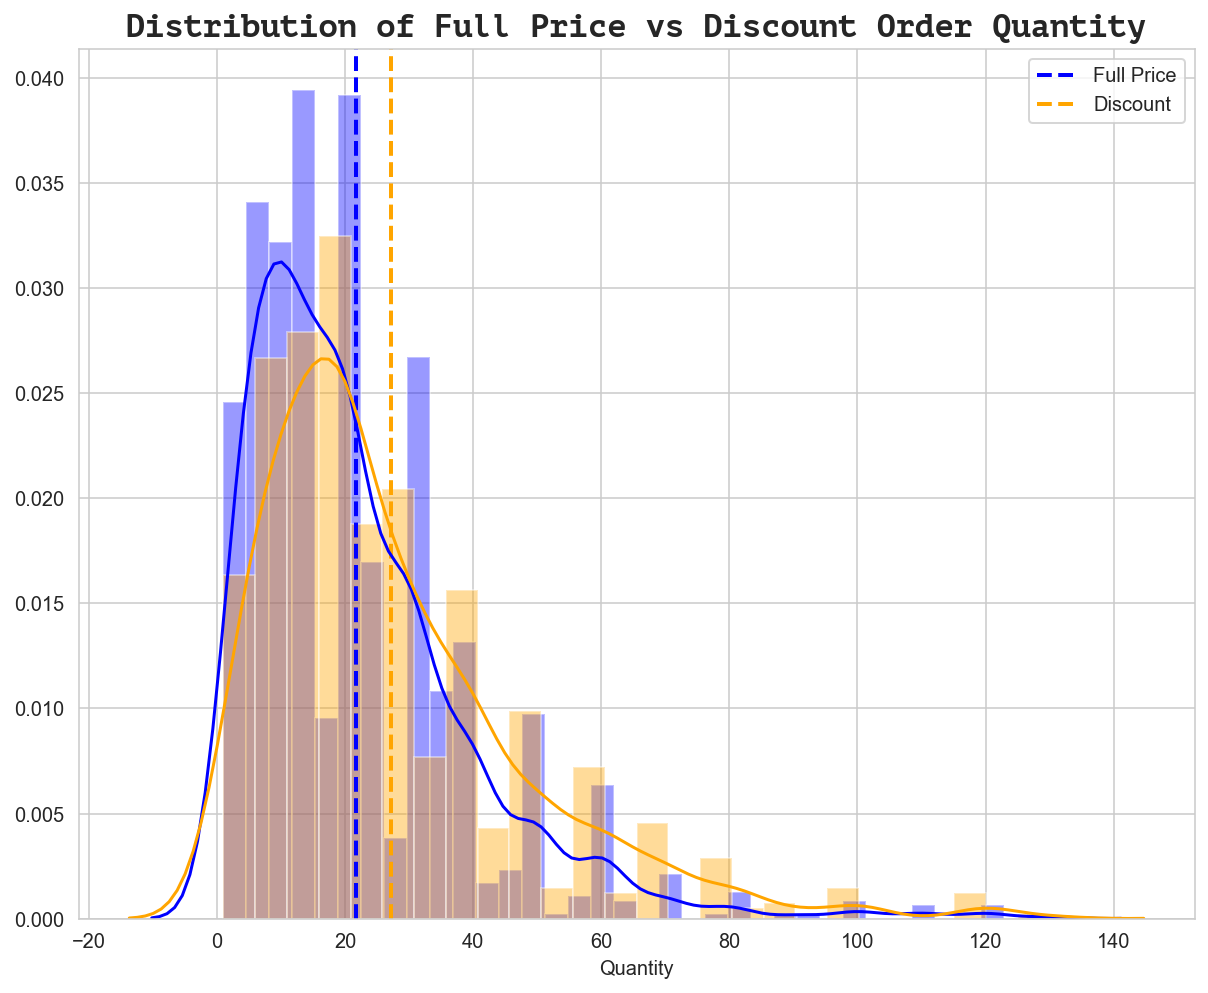

In [13]:
# visually inspect differences in mean and StDev of distributions
sns.set_style("whitegrid")
%config InlineBackend.figure_format='retina'
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

ax.axvline(fullprice.mean(), color='blue', lw=2, ls='--', label='FP Avg')
ax.axvline(discount.mean(), color='orange', lw=2, ls='--', label='DC Avg')

fdict = {'fontfamily': 'PT Mono','fontsize': 16}

sns.distplot(fullprice, ax=ax, hist=True, kde=True, color='blue')
sns.distplot(discount, ax=ax, hist=True, kde=True, color='orange')
ax.legend(['Full Price', 'Discount'])
ax.set_title("Distribution of Full Price vs Discount Order Quantity", fontdict=fdict)

Text(0.5, 1.0, 'Discount Levels and Order Qty')

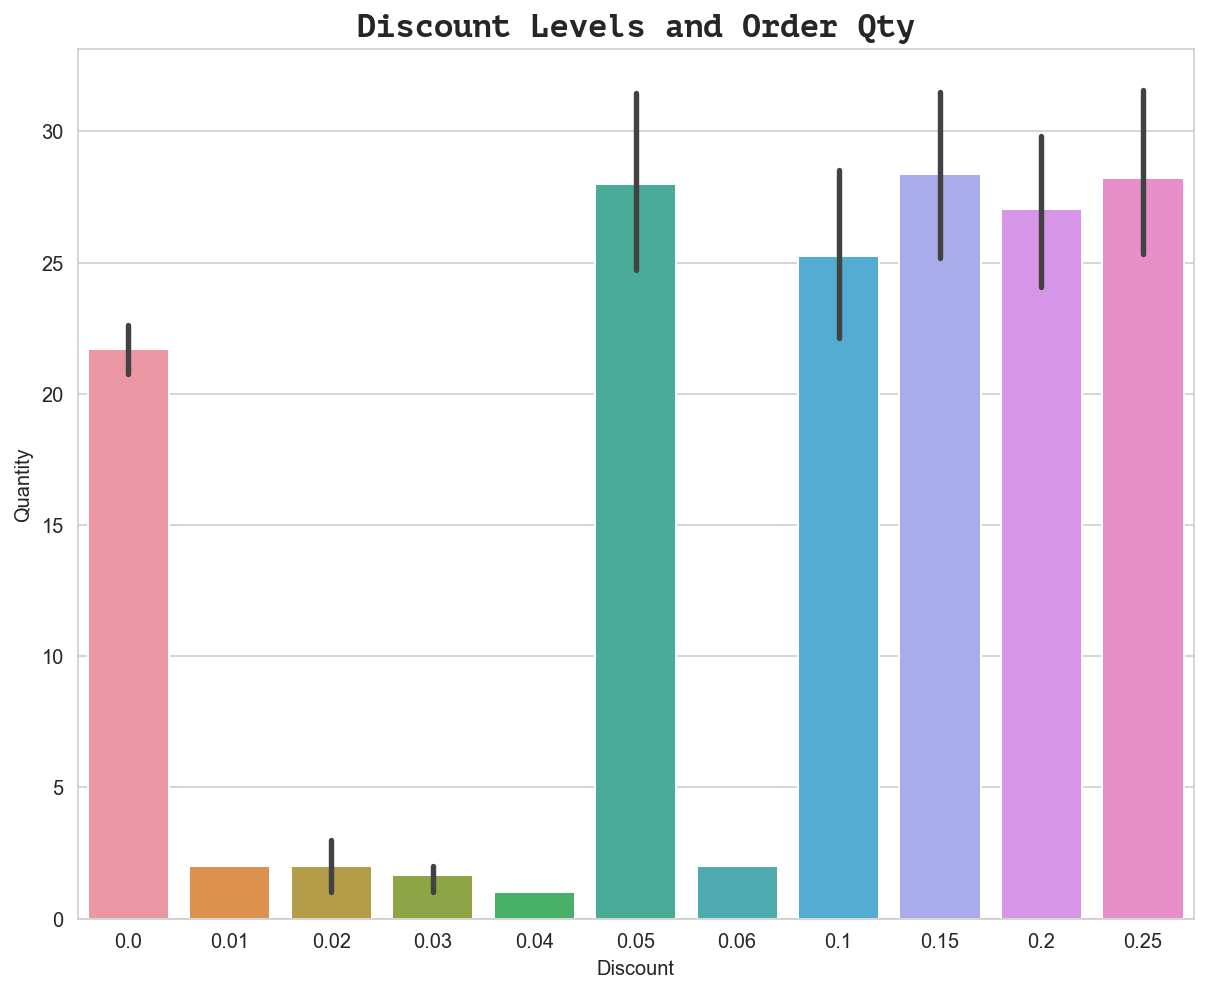

In [14]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
ax = sns.barplot(x='Discount', y='Quantity', data=df_orderDetail)
ax.set_title('Discount Levels and Order Qty', fontdict={'family': 'PT Mono', 'size':16})

We can already see that there is a clear relationship between order quantity and specific discount levels before running any statistical tests. However, what is more interesting to note from the visualization above is that the discount levels that DO have an effect appear to be very similar as far as the mean order quantity. The indication is that discount amount produces diminishing returns (offering a discount higher than 5% - the minimum effective amount - does not actually produce higher order quantity which means we are losing revenue we would have otherwise captured).

## Assumption Tests
**Select the appropriate t-test based on tests for the assumptions of normality and homogeneity of variance.**

### Sample Size
Check if sample sizes allow us to ignore assumptions; if not, test assumption normality.

Text(0.5, 1.0, 'Order Quantity Sample Sizes: Full Price vs Discount')

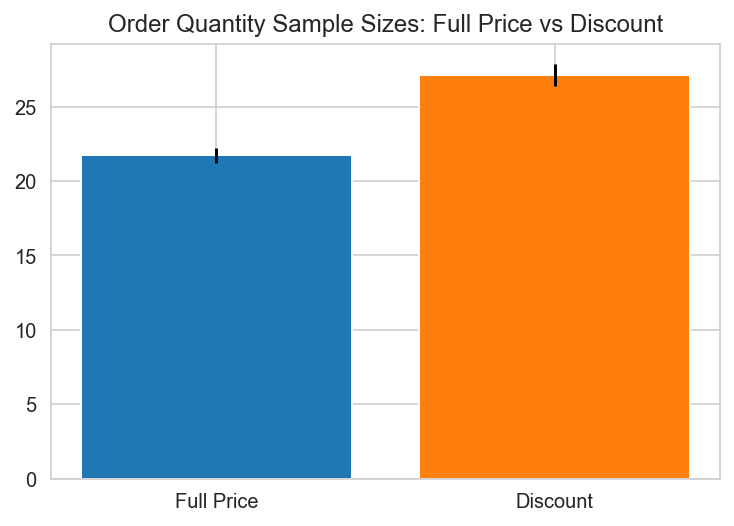

In [15]:
# visualize sample size comparisons for two groups (normality check)
import scipy.stats as stat
plt.bar(x='Full Price', height=fullprice.mean(), yerr=stat.sem(fullprice))
plt.bar(x='Discount', height=discount.mean(), yerr=stat.sem(discount))
plt.title("Order Quantity Sample Sizes: Full Price vs Discount")

### Normality Test
Check assumptions of normality and homogeneity of variance

In [16]:
# Test for normality - D'Agostino-Pearson's normality test: scipy.stats.normaltest
stat.normaltest(fullprice), stat.normaltest(discount)

(NormaltestResult(statistic=544.5770045551502, pvalue=5.579637380545965e-119),
 NormaltestResult(statistic=261.528012299789, pvalue=1.6214878452829618e-57))

Failed normality test (p-values < 0.05). Run non-parametric test:

In [17]:
# Run non-parametric test (since normality test failed)
stat.mannwhitneyu(fullprice, discount)

MannwhitneyuResult(statistic=461541.0, pvalue=6.629381826999866e-11)

### Statistical Test
Perform chosen statistical test.

In [18]:
# run tukey test for OQD (Order Quantity Discount) 
data = df_orderDetail['Quantity'].values
labels = df_orderDetail['Discount'].values

import statsmodels.api as sms
model = sms.stats.multicomp.pairwise_tukeyhsd(data,labels)

In [19]:
# save OQD tukey test model results into dataframe (OQD: order quantity discount)
tukey_OQD = pd.DataFrame(data=model._results_table[1:], columns=model._results_table[0])
tukey_OQD

,group1,group2,meandiff,p-adj,lower,upper,reject
0,0.0,0.01,-19.7153,0.9,-80.3306,40.9001,False
1,0.0,0.02,-19.7153,0.9,-62.593,23.1625,False
2,0.0,0.03,-20.0486,0.725,-55.0714,14.9742,False
3,0.0,0.04,-20.7153,0.9,-81.3306,39.9001,False
4,0.0,0.05,6.2955,0.0011,1.5381,11.053,True
5,0.0,0.06,-19.7153,0.9,-80.3306,40.9001,False
6,0.0,0.1,3.5217,0.4269,-1.3783,8.4217,False
7,0.0,0.15,6.6669,0.0014,1.551,11.7828,True
8,0.0,0.2,5.3096,0.0303,0.2508,10.3684,True
9,0.0,0.25,6.525,0.0023,1.3647,11.6852,True


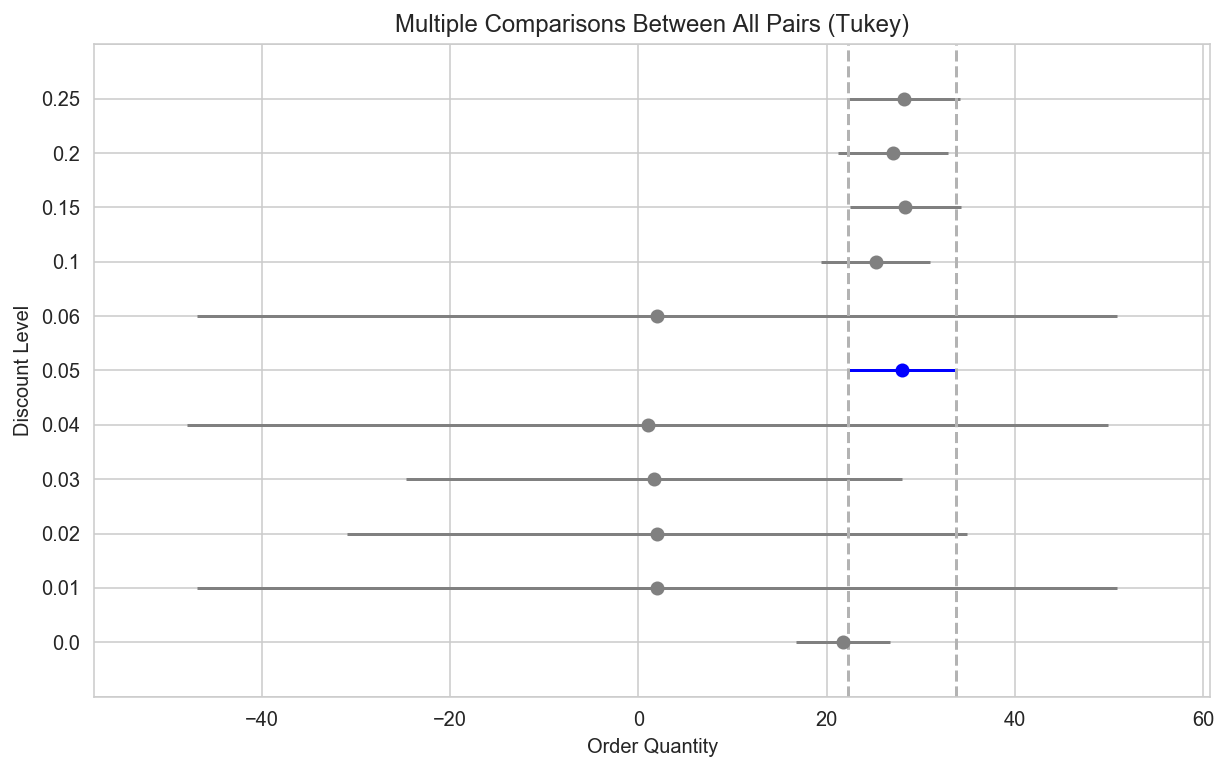

In [20]:
# Plot a universal confidence interval of each group mean comparing significant differences in group means. 
# Significant differences at the alpha=0.05 level can be identified by intervals that do not overlap 

oq_data = df_orderDetail['Quantity'].values
discount_labels = df_orderDetail['Discount'].values

from statsmodels.stats.multicomp import MultiComparison
oqd = MultiComparison(oq_data, discount_labels)
results = oqd.tukeyhsd()
results.plot_simultaneous(comparison_name=0.05, xlabel='Order Quantity', ylabel='Discount Level');

### Effect Size
Calculate effect size using Cohen's D as well as any post-hoc tests.

In [22]:
Cohen_d(discount, fullprice)

0.2862724481729282

### Post-hoc Tests

The mean quantity per order is similar for each of the discount levels that we identified as significant. The obvious conclusion to draw from this is that offering a discount higher than 5% does not increase the order quantities; higher discounts only produce higher loss in revenue.

In [23]:
# Extract revenue lost per discounted order where discount had no effect on order quantity
cur.execute("""SELECT Discount, 
                SUM(UnitPrice * Quantity) as 'revLoss',
                COUNT(OrderId) as 'NumOrders'
                FROM orderDetail  
                GROUP BY Discount
                HAVING Discount != 0 AND Discount != 0.05
                ORDER BY revLoss DESC;""")
df = pd.DataFrame(cur.fetchall())
df. columns = [i[0] for i in cur.description]
print(len(df))
df.head()


9


,Discount,revLoss,NumOrders
0,0.25,131918.09,154
1,0.20,111476.38,161
2,0.15,102948.44,157
3,0.10,101665.71,173
4,0.03,124.65,3


In [24]:
print("Total Revenue Forfeited $", df.revLoss.sum())
print("Number of Orders Affected ", df.NumOrders.sum())
print("Avg Forfeited Per Order $", df.revLoss.sum()/df.NumOrders.sum())

Total Revenue Forfeited $ 448373.27
Number of Orders Affected  653
Avg Forfeited Per Order $ 686.6359418070444


## Analyze Results

Where alpha = 0.05, the null hypothesis is rejected. Discount amount has a statistically significant effect on the quantity in an order where the discount level is equal to 5%, 15%, 20% or 25%.

# H2: Country--Discount

**Do individual countries show a statistically significant preference for discount?**

**If so, which countries and to what extent?** 

## Hypotheses

- $H_0$: Countries purchase equal quantities of discounted vs non-discounted products.
- $H_A$: Countries purchase different quantities of discounted vs non-discounted products.

## EDA
Select the proper dataset for analysis, perform EDA, and generate data groups for testing.

### Select

In [25]:
df_order = get_table(cur, "'Order'")
display(df_order.head())
display(df_orderDetail.head())

,OrderId,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,discounted
0,10248/11,10248,11,14.0,12,0.0,0
1,10248/42,10248,42,9.8,10,0.0,0
2,10248/72,10248,72,34.8,5,0.0,0
3,10249/14,10249,14,18.6,9,0.0,0
4,10249/51,10249,51,42.4,40,0.0,0


In [26]:
# Rename 'Id' to 'OrderId' for joining tables with matching primary key name
df_order.rename({'Id':'OrderId'}, axis=1, inplace=True)
display(df_order.head())

,OrderId,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [27]:
df_order.set_index('OrderId',inplace=True)
display(df_order.head())

,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
OrderId,,,,,,,,,,,,,
10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium


In [28]:
df_country = df_orderDetail.merge(df_order, on='OrderId', copy=True)

### Explore

In [29]:
fs.ft.hakkeray.hot_stats(df_country, 'ShipCountry')

-------->
HOT!STATS
<--------

SHIPCOUNTRY
Data Type: object

min    Argentina
max    Venezuela
Name: ShipCountry, dtype: object 

à-la-Mode: 
0    USA
dtype: object


No Nulls Found!

Non-Null Value Counts:
USA            352
Germany        328
Brazil         203
France         184
UK             135
Austria        125
Venezuela      118
Sweden          97
Canada          75
Mexico          72
Belgium         56
Ireland         55
Spain           54
Finland         54
Italy           53
Switzerland     52
Denmark         46
Argentina       34
Portugal        30
Poland          16
Norway          16
Name: ShipCountry, dtype: int64

# Unique Values: 21



### Group

In [30]:
countries = df_country.groupby('ShipCountry').groups
countries.keys()

dict_keys(['Argentina', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Denmark', 'Finland', 'France', 'Germany', 'Ireland', 'Italy', 'Mexico', 'Norway', 'Poland', 'Portugal', 'Spain', 'Sweden', 'Switzerland', 'UK', 'USA', 'Venezuela'])

In [31]:
df_countries = df_country[['ShipCountry','Quantity','discounted']].copy()
df_countries.ShipCountry.value_counts()

USA            352
Germany        328
Brazil         203
France         184
UK             135
Austria        125
Venezuela      118
Sweden          97
Canada          75
Mexico          72
Belgium         56
Ireland         55
Spain           54
Finland         54
Italy           53
Switzerland     52
Denmark         46
Argentina       34
Portugal        30
Poland          16
Norway          16
Name: ShipCountry, dtype: int64

In [32]:
import researchpy as rp
rp.summary_cont(df_countries.groupby(['discounted']))

Quantity                                                      
                  N       Mean         SD        SE  95% Conf.   Interval
discounted                                                               
0              1317  21.715262  17.507493  0.482426  20.769706  22.660818
1               838  27.109785  20.771439  0.717537  25.703412  28.516159

## Test

### Sample Size

Argentina does not contain one of the groups.
Austria


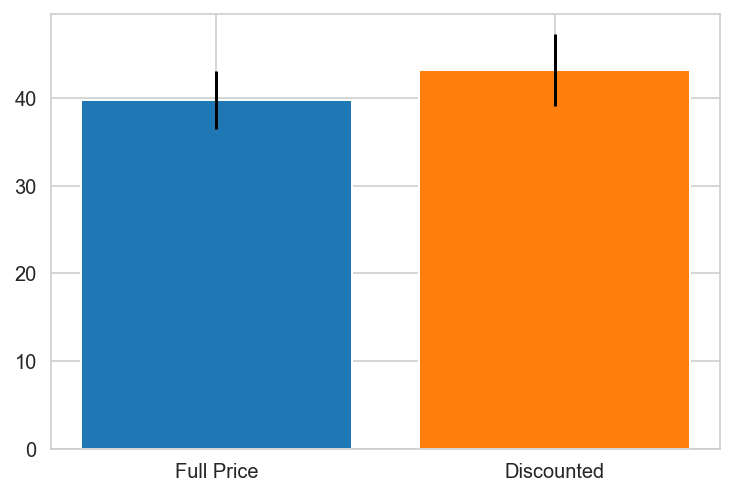

Belgium


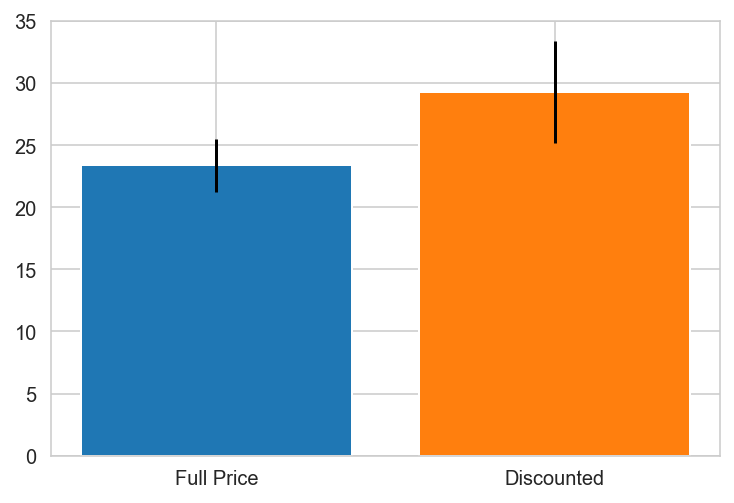

Brazil


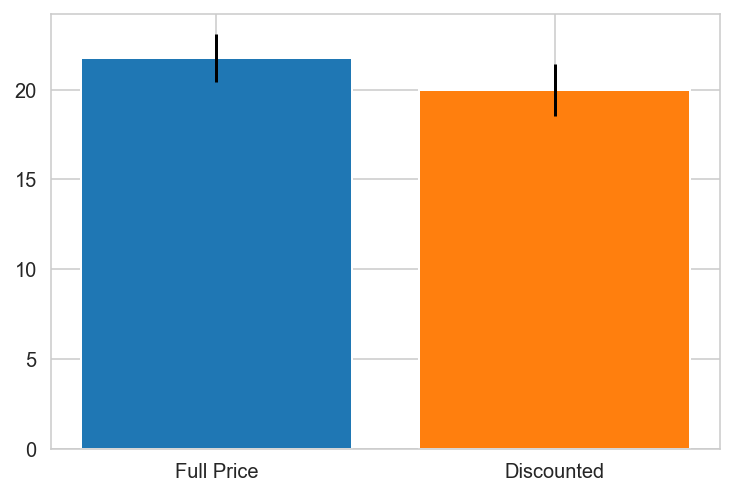

Canada


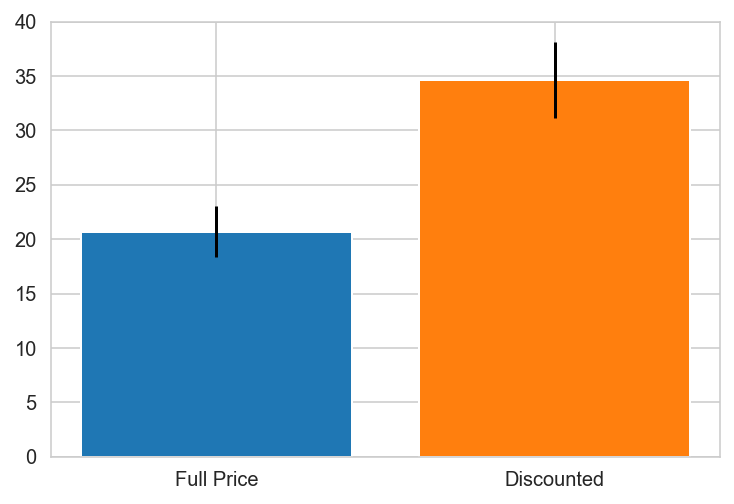


Canada PREFERS DISCOUNTS!
Denmark


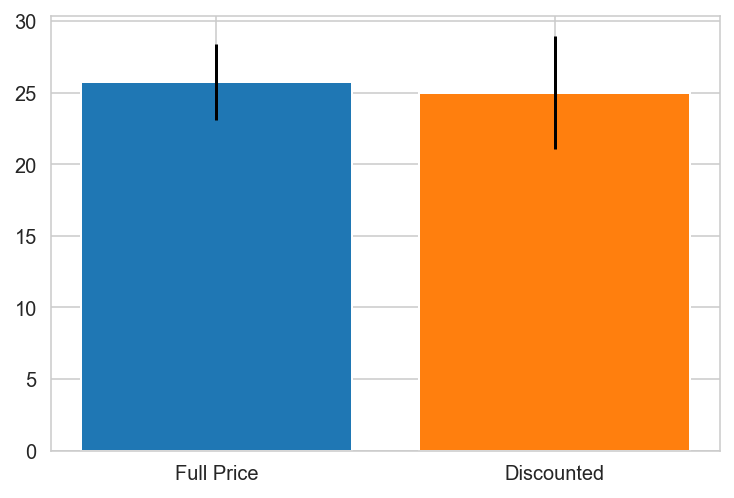

Finland


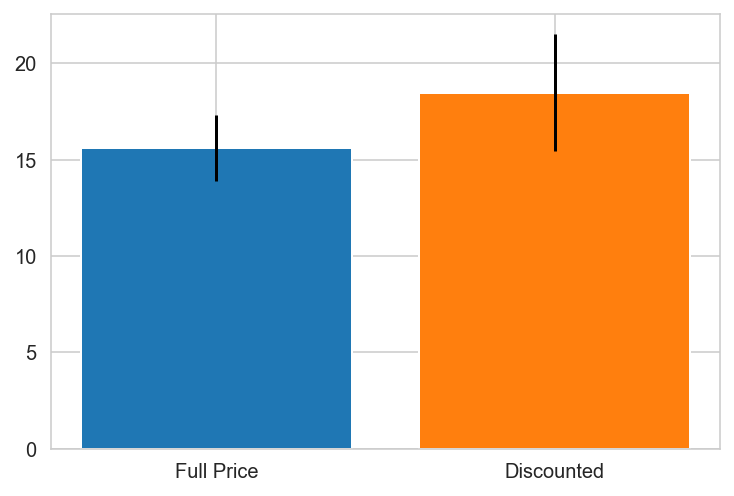

France


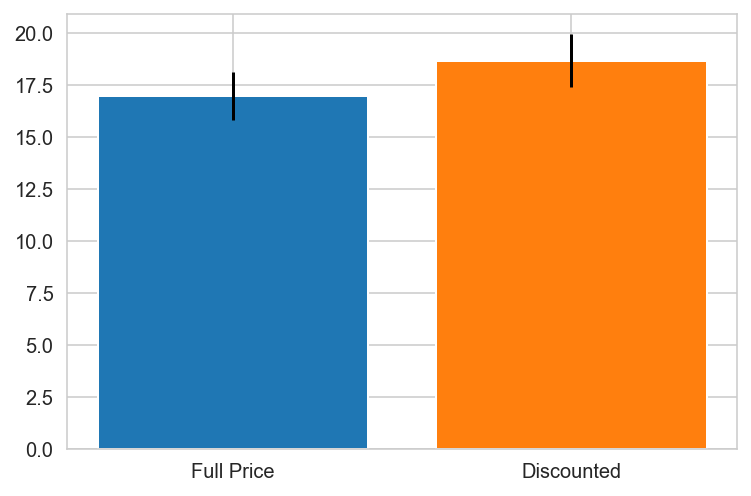

Germany


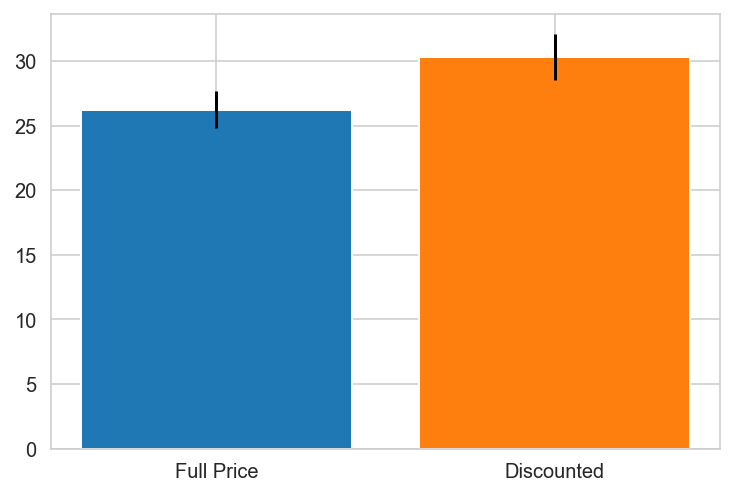

Ireland


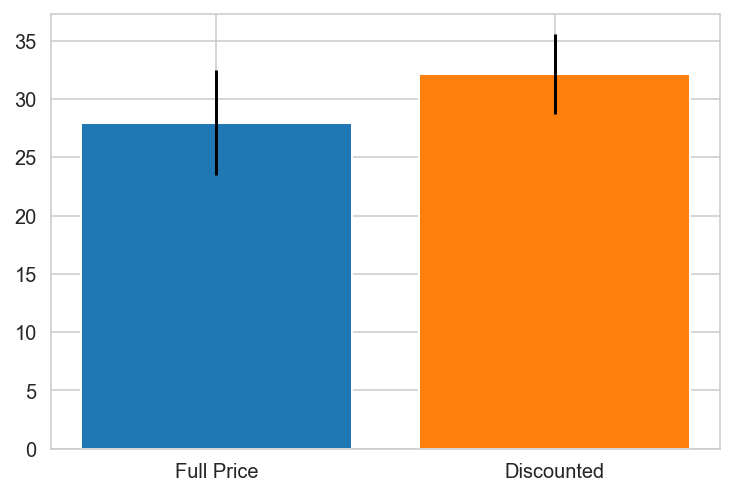

Italy


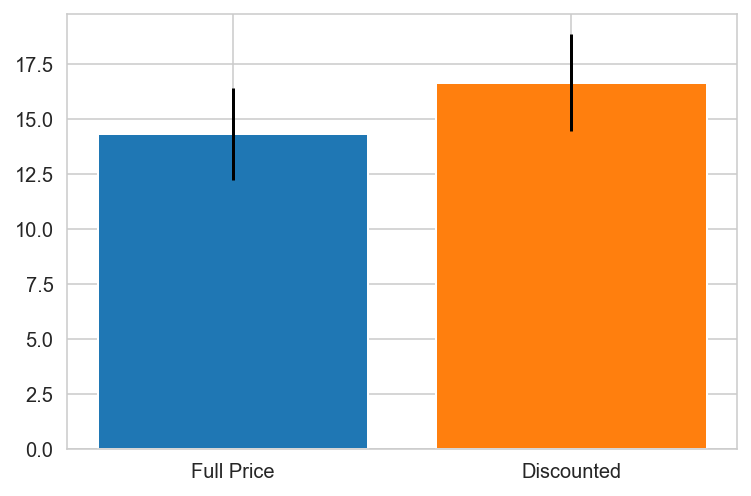

Mexico


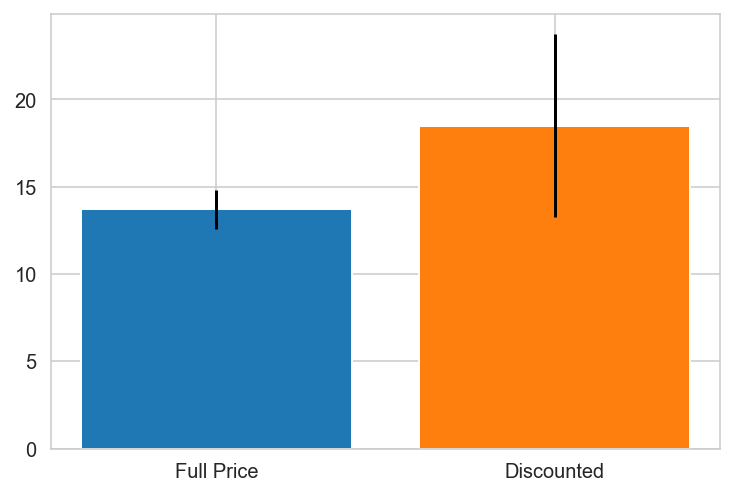


Norway PREFERS DISCOUNTS!
Portugal


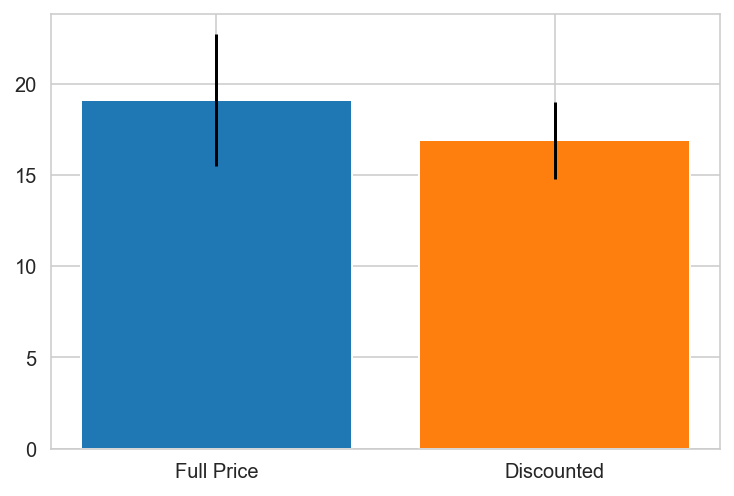

Spain


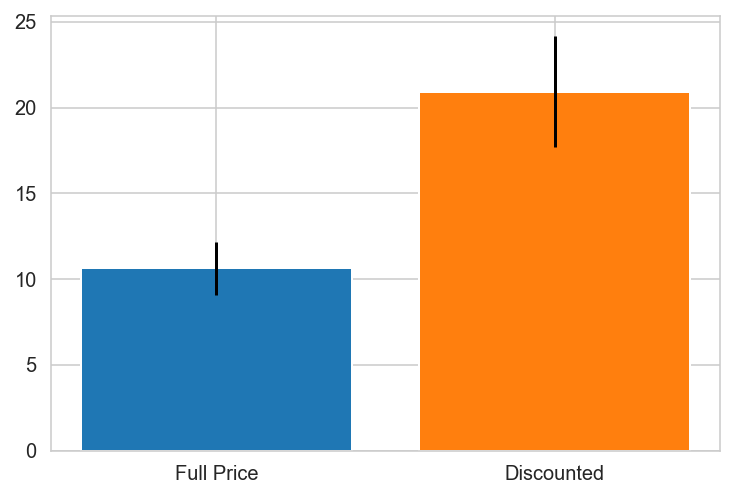


Spain PREFERS DISCOUNTS!
Sweden


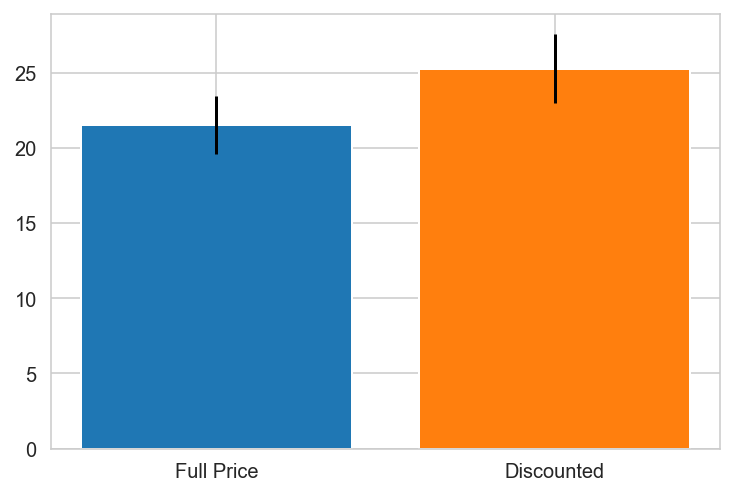

Switzerland


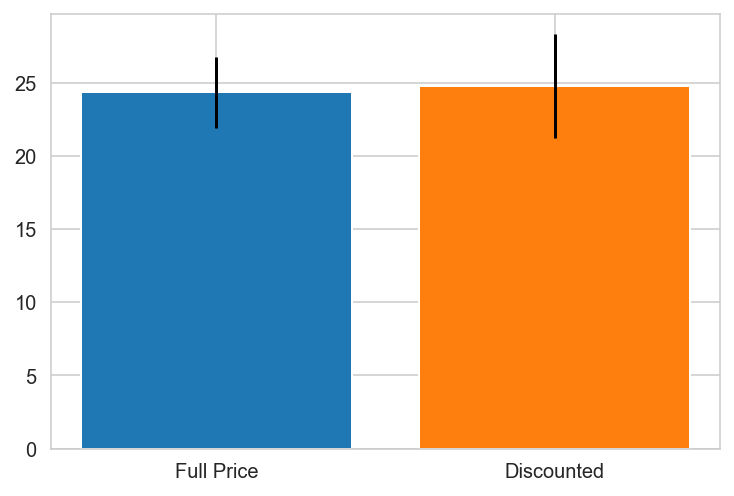

UK


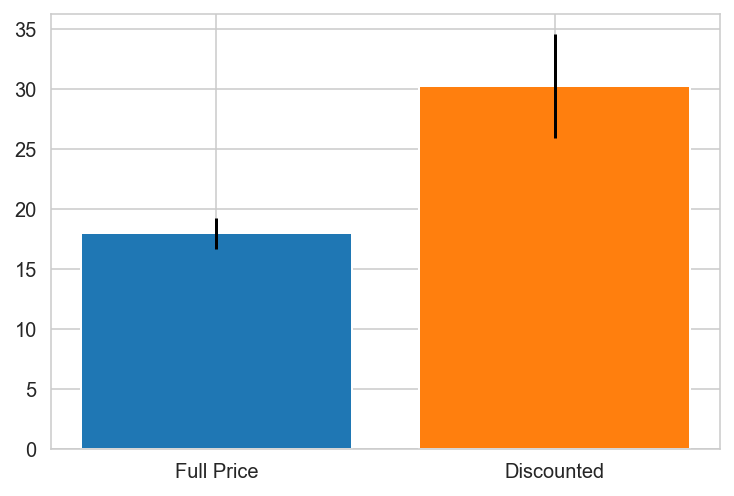


UK PREFERS DISCOUNTS!
USA


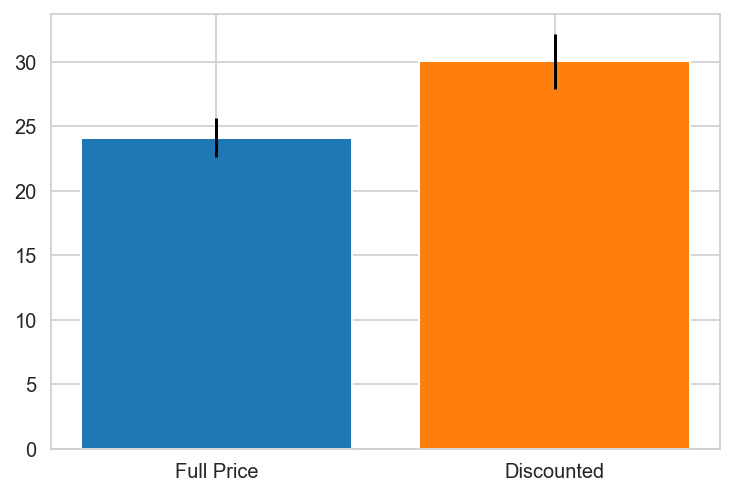


USA PREFERS DISCOUNTS!
Venezuela


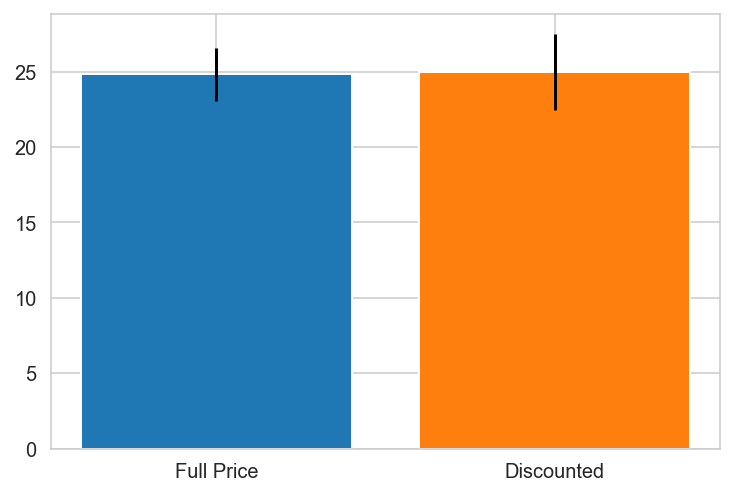

{'Canada': 0.0010297982736886485,
 'Norway': 0.04480094051665529,
 'Spain': 0.0025087181106716217,
 'UK': 0.00031794803200322925,
 'USA': 0.019868707223971476}

In [33]:
# Check if sample sizes allow us to ignore assumptions;
# visualize sample size comparisons for two groups (normality check)

stat_dict = {}

for k,v in countries.items():
    try:
        grp0 = df_countries.loc[v].groupby('discounted').get_group(0)['Quantity']
        grp1 = df_countries.loc[v].groupby('discounted').get_group(1)['Quantity']
        print(f"{k}")
        
        import scipy.stats as stat

        plt.bar(x='Full Price', height=grp0.mean(), yerr=stat.sem(grp0))
        plt.bar(x='Discounted', height=grp1.mean(), yerr=stat.sem(grp1))
        plt.show()
        
    except:
        pass
        
    try:
        result = stat.ttest_ind(grp0,grp1)
        if result[1] < 0.05:
            stat_dict[k] = result[1]
            print(f"\n{k} PREFERS DISCOUNTS!")
        else:
            continue
    except:
        print(f"{k} does not contain one of the groups.")
stat_dict

In [34]:
stat_dict

{'Canada': 0.0010297982736886485,
 'Norway': 0.04480094051665529,
 'Spain': 0.0025087181106716217,
 'UK': 0.00031794803200322925,
 'USA': 0.019868707223971476}

### Normality Test

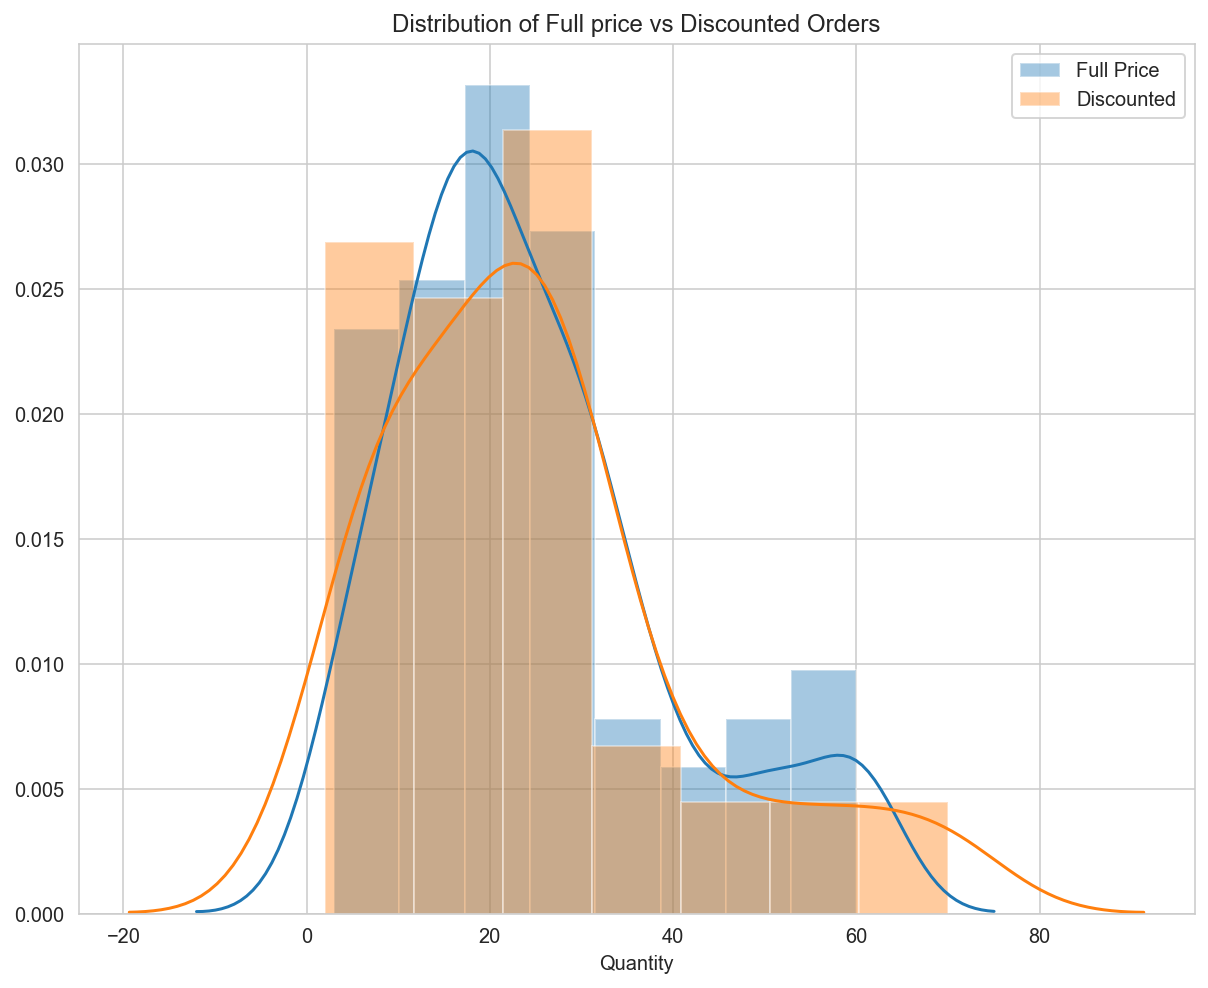

In [35]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(title="Distribution of Full price vs Discounted Orders")

sns.distplot(grp0)
sns.distplot(grp1)
ax.legend(['Full Price','Discounted'])

In [36]:
# Test for normality - D'Agostino-Pearson's normality test: scipy.stats.normaltest
stat.normaltest(grp0), stat.normaltest(grp1)

(NormaltestResult(statistic=9.316225653095811, pvalue=0.009484344125890621),
 NormaltestResult(statistic=10.255309993341813, pvalue=0.005930451108115991))

In [37]:
# Run non-parametric test (since normality test failed)
stat.mannwhitneyu(grp0, grp1)

MannwhitneyuResult(statistic=1632.5, pvalue=0.44935140740973323)

**Canada, Spain, UK and the USA have pvalues < 0.05 indicating there is a relationship between discount and order quantity and the null hypothesis is rejected for these individual countries.**

### Statistical Test

In [38]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols("Quantity~C(discounted)+C(ShipCountry)+C(discounted):C(ShipCountry)", data=df_countries).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

/Users/hakkeray/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 18
  'rank is %d' % (J, J_), ValueWarning)
/Users/hakkeray/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 20, but rank is 18
  'rank is %d' % (J, J_), ValueWarning)


In [39]:
# reformat scientific notation of results for easier interpretation
anova_table.style.format("{:.5f}", subset=['PR(>F)'])

,sum_sq,df,F,PR(>F)
C(discounted),9.78092e-08,1,3.07557e-10,0.99999
C(ShipCountry),101347,20,15.9341,0.00000
C(discounted):C(ShipCountry),15584.9,20,2.4503,0.00061
Residual,672930,2116,nan,nan


In [40]:
# calculate ttest_ind p-values and significance for individual countries
print(f"\n Countries with p-values < 0.05 - Null Hypothesis Rejected:")
for k,v in countries.items():
    try:
        grp0 = df_countries.loc[v].groupby('discounted').get_group(0)['Quantity']
        grp1 = df_countries.loc[v].groupby('discounted').get_group(1)['Quantity']
        result = stat.ttest_ind(grp0,grp1)
        if result[1] < 0.05:
            
            print(f"\n\t{k}: {result[1].round(4)}")
        else:
            continue
    except:
        None 


 Countries with p-values < 0.05 - Null Hypothesis Rejected:

	Canada: 0.001

	Spain: 0.0025

	UK: 0.0003

	USA: 0.0199


Although discount does not have a significant effect on countries overall (p = 0.99), there is a statistically significant relationship between order quantities and discount in some of the countries (p=0.0006).

Countries with p-values < 0.05 - Null Hypothesis Rejected:

	Canada: 0.001

	Spain: 0.0025

	UK: 0.0003

	USA: 0.0199

Text(0.5, 1.0, 'Average Discount Order Quantity by Country')

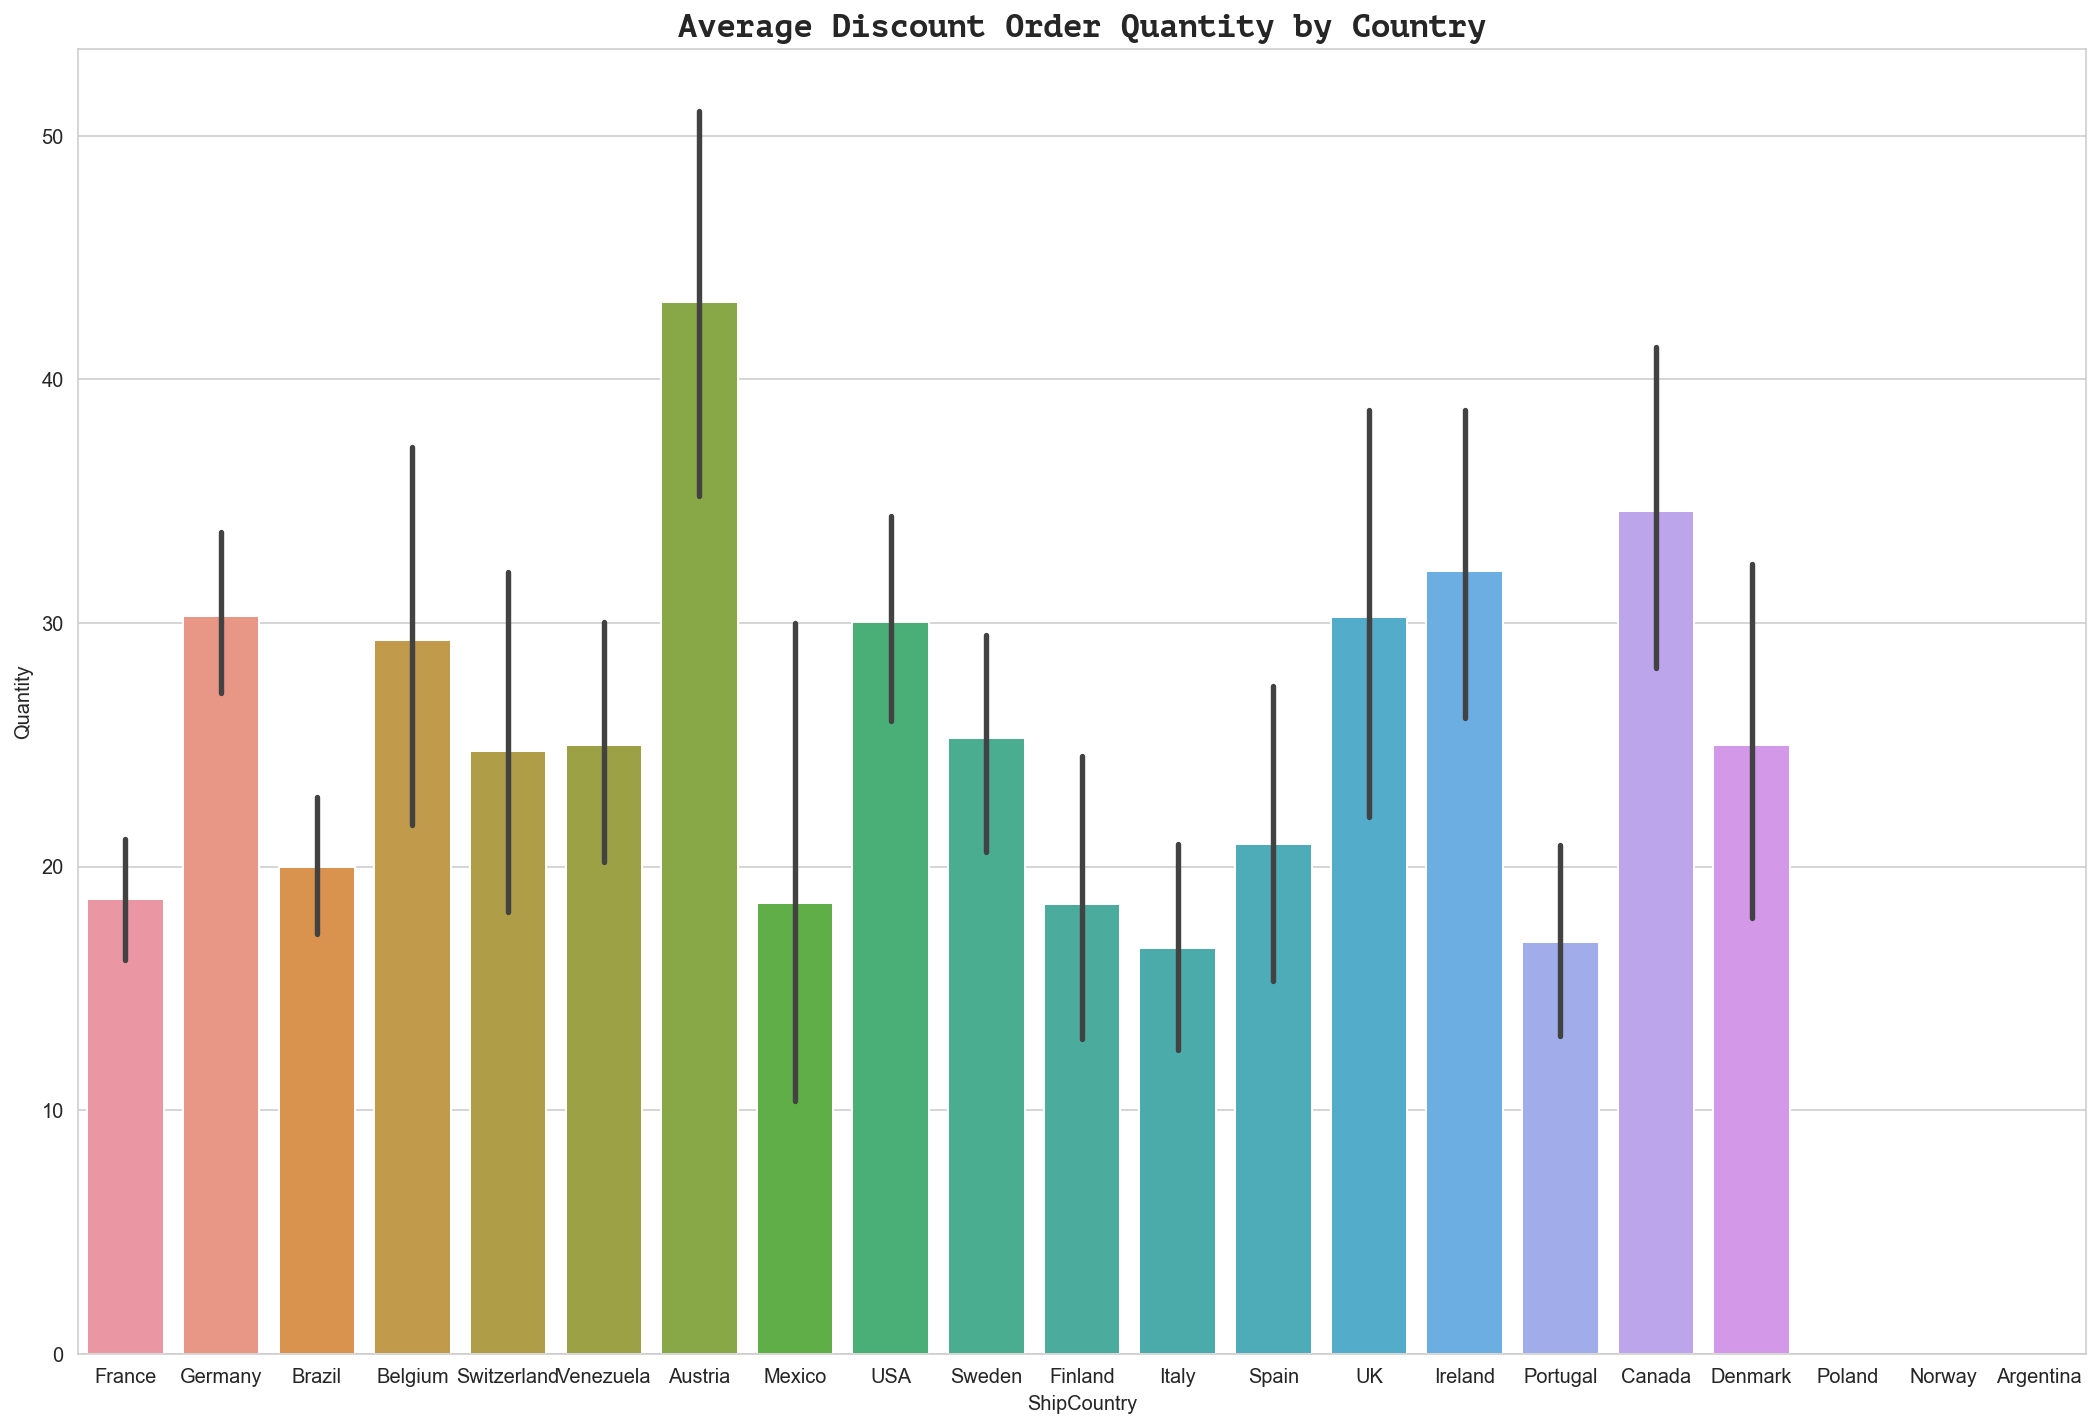

In [41]:
y1 = df_countries.groupby('discounted').get_group(1)['Quantity']


fig = plt.figure(figsize=(18,12))
ax = fig.gca()

ax = sns.barplot(x='ShipCountry', y=y1, data=df_countries)

ax.set_title('Average Discount Order Quantity by Country', fontdict={'family': 'PT Mono', 'size':16})

### Effect Size

Effect size testing is unnecessary since the null hypothesis for the main question was not rejected.

### Post-hoc Tests

In [42]:
#!pip install pandasql
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

,OrderQty
count,39.000000
mean,22.596281
std,7.620086
min,9.970588
25%,17.458458
50%,21.750000
75%,25.985539
max,43.172414


Text(0.5, 1.0, 'Average Order Quantity by Country: Fullprice vs Discount Orders')

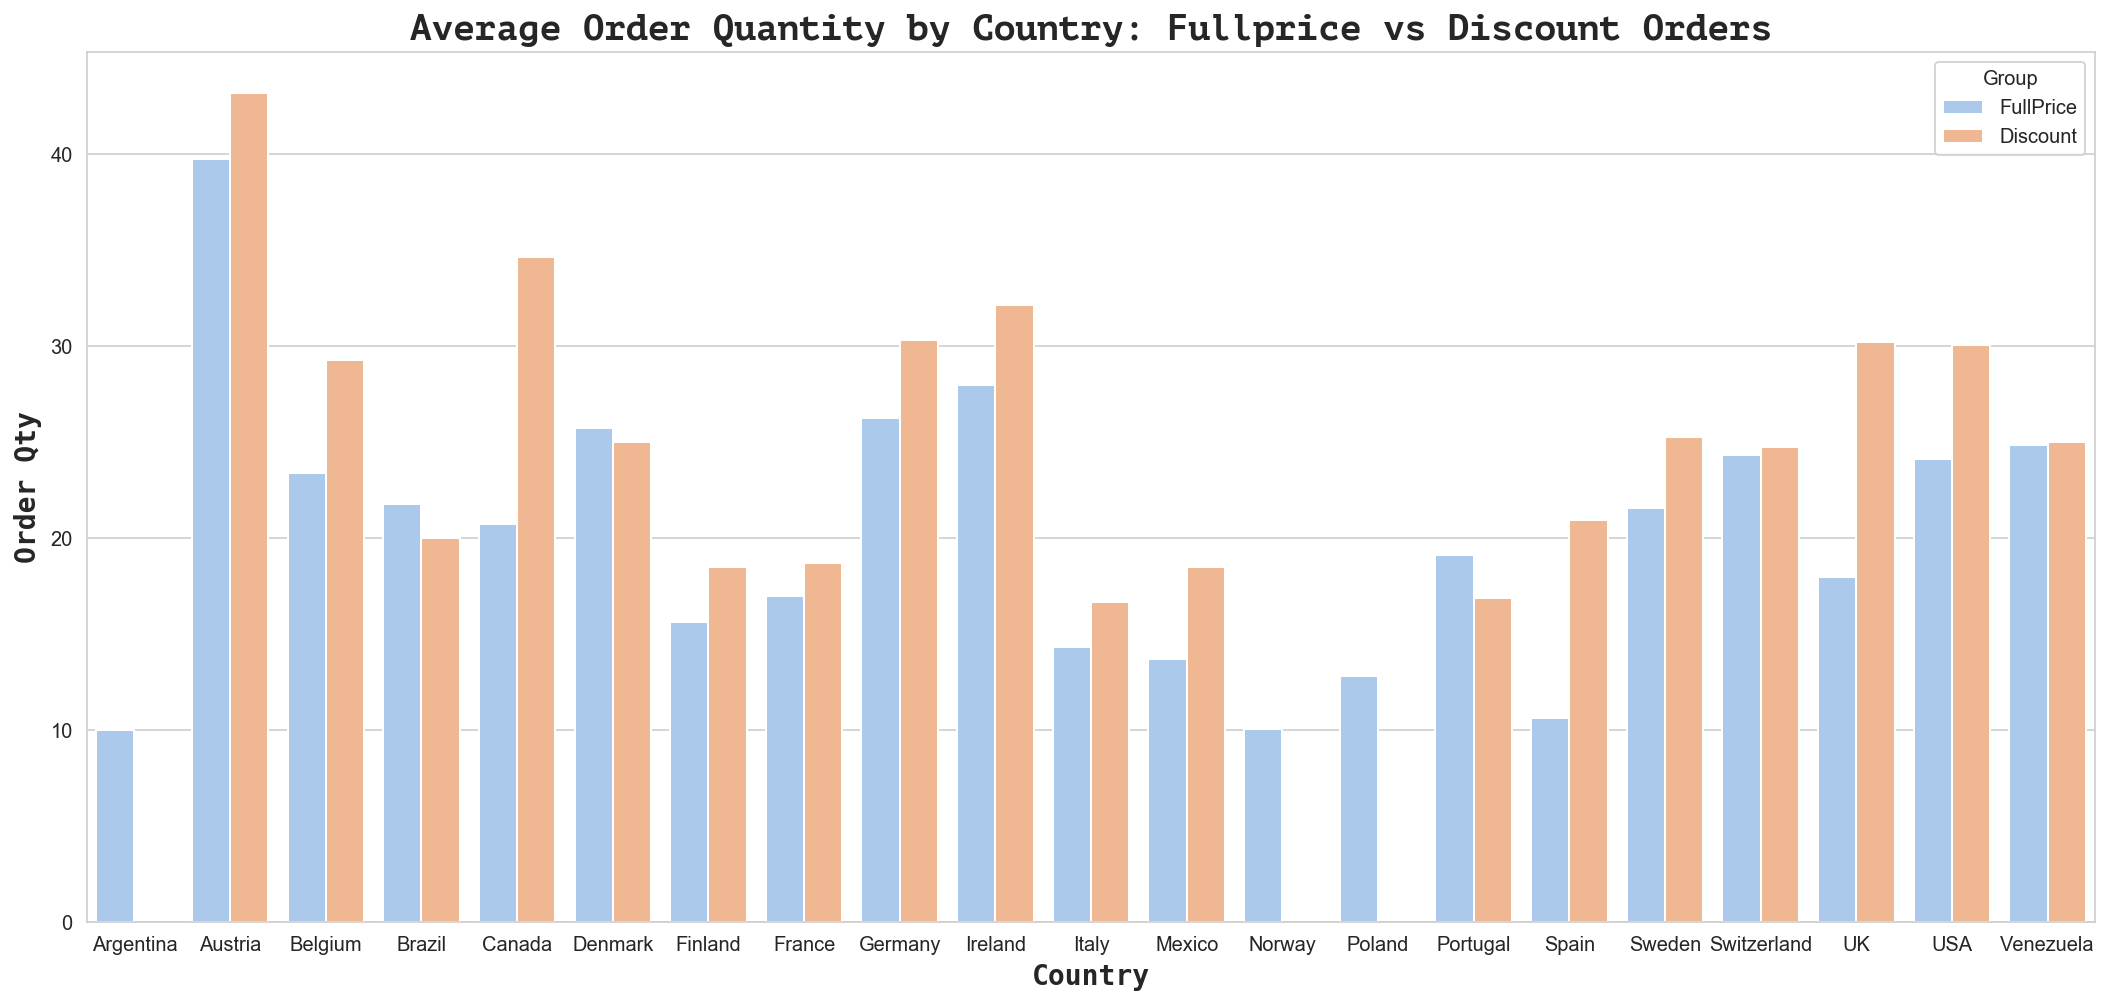

In [43]:
# Compare number of discount vs fullprice orders by country.
# Create bar plots grouped as discount vs fullprice orders by country
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18,8))

q1 = "SELECT ShipCountry, AVG(Quantity) as OrderQty from df_countries where discounted = 0 group by 1;"
q2 = "SELECT ShipCountry, AVG(Quantity) as OrderQty from df_countries where discounted = 1 group by 1;"

df_fpCount = pysqldf(q1)
df_dcCount = pysqldf(q2)

df_fpCount['Group'] = 'FullPrice'
df_dcCount['Group'] = 'Discount'

df_country_qty = pd.concat([df_fpCount, df_dcCount], axis=0)

display(df_country_qty.describe())

#ax = sns.barplot(x='ShipCountry', y='NumOrders', data=country_df, hue='Group', palette='pastel', orient='v')
#ax.set_title('Number of Fullprice vs Discount Orders by Country', fontdict={'family': 'monospace', 'size':16})

#ax1 = sns.barplot(x='ShipCountry', y='TotalQty', data=country_df, hue='Group', palette='pastel', orient='v')
#ax1.set_title('Total Qty of Fullprice vs Discount Orders by Country', fontdict={'family': 'monospace', 'size':16})

sns.set_style("whitegrid")
fig = plt.figure(figsize=(18,8))
ax = fig.gca(title="Average Order Quantity by Country: Fullprice vs Discount")

sns.barplot(x='ShipCountry', y='OrderQty', ax=ax, data=df_country_qty, hue='Group', 
            palette='pastel', orient='v', ci=68, capsize=.2)

## Set Title,X/Y Labels,fonts,formatting
ax_font = {'family':'monospace','weight':'semibold','size':14}
tick_font = {'size':12,'ha':'center','rotation':45}
t_label = "Average Order Quantity by Country: Fullprice vs Discount Orders"
t_font = {'family': 'PT Mono', 'size':18}

ax.set_ylabel("Order Qty", fontdict=ax_font)
ax.set_xlabel("Country", fontdict=ax_font)
#ax.set_title('Average Order Quantity by Country: Fullprice vs Discount', fontdict={'family': 'PT Mono', 'size':16})
ax.set_title(t_label, fontdict=t_font)


According to the plot above, the actual number of discounted orders is lower than the number of full price orders. Let's compare the sum of quantities for these orders in each group.

,OrderCount
count,39.000000
mean,55.256410
std,48.722478
min,8.000000
25%,22.000000
50%,39.000000
75%,69.500000
max,210.000000


Text(0.5, 1.0, 'Count of Fullprice vs Discount Orders by Country')

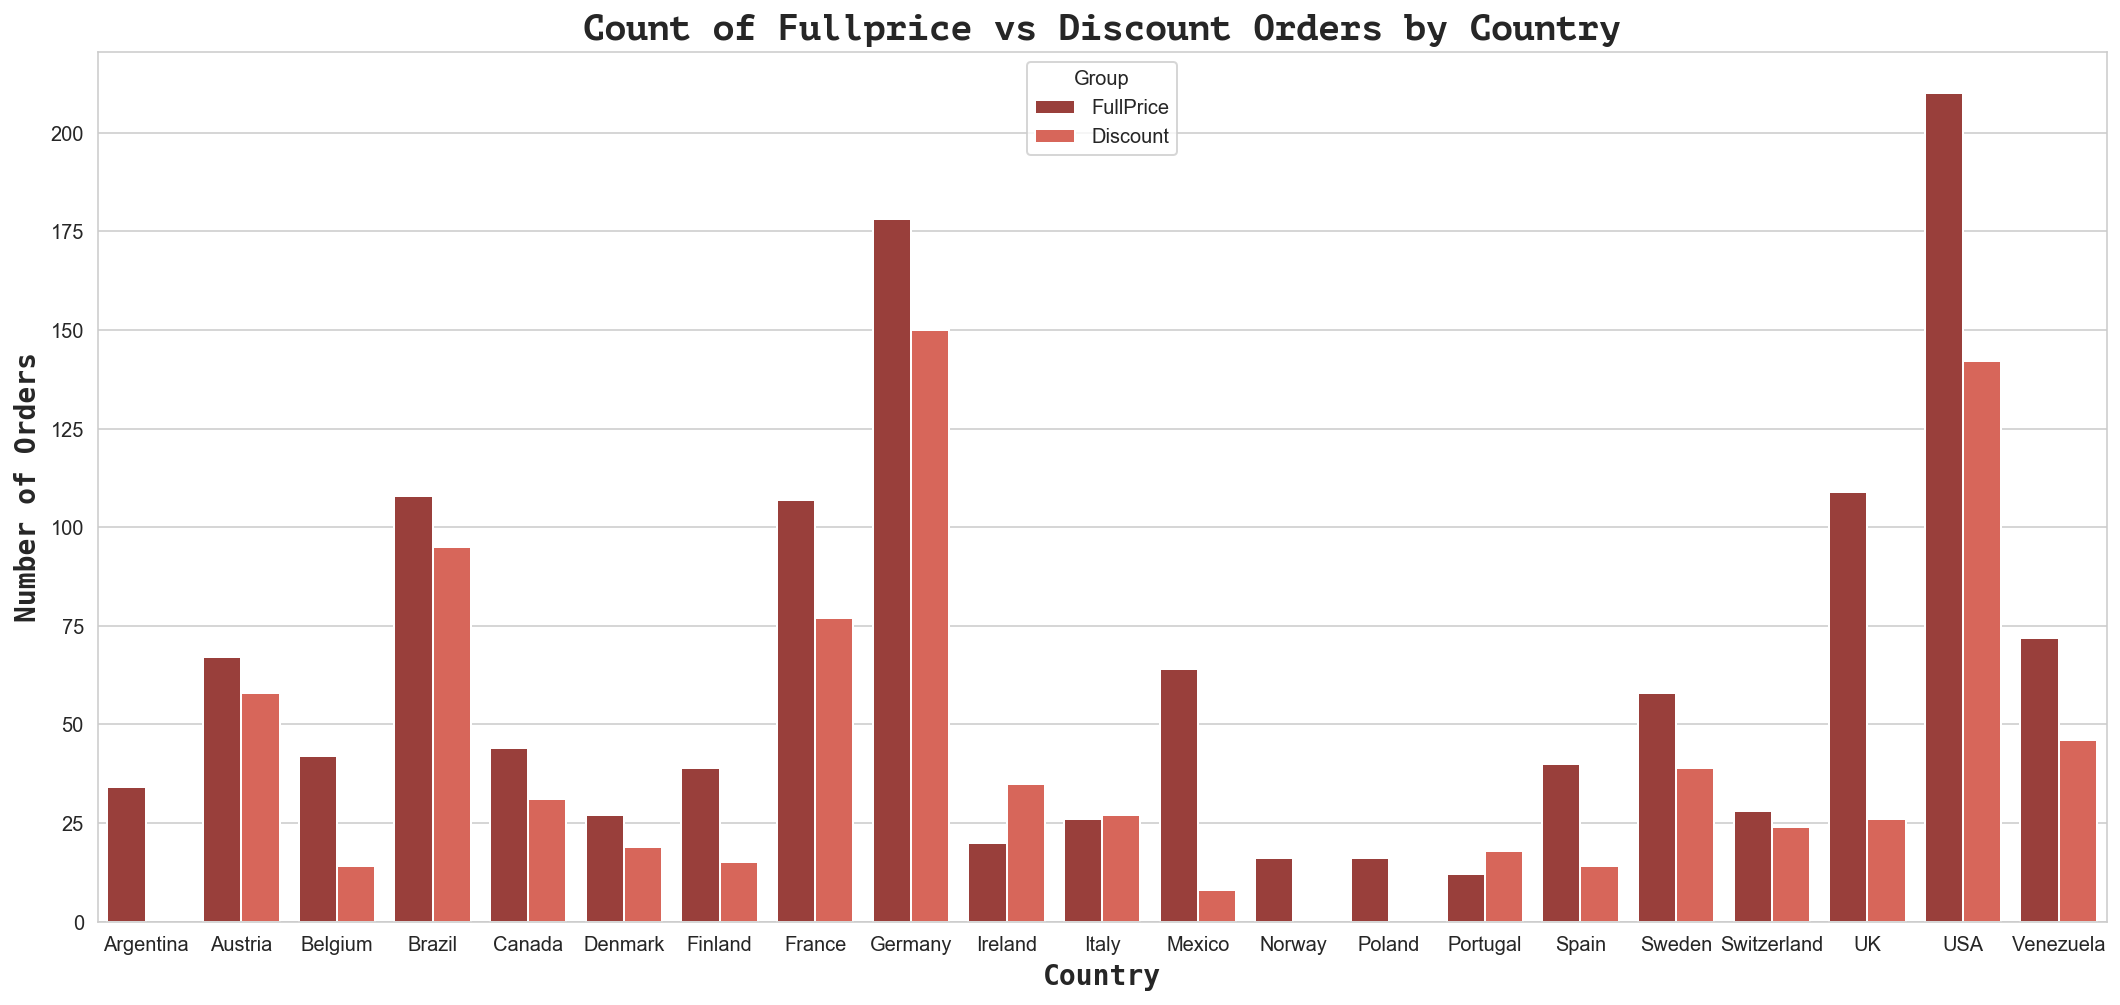

In [44]:
# Compare number of discount vs fullprice orders by country.
# Create bar plots grouped as discount vs fullprice orders by country
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18,8))

q1 = "SELECT ShipCountry, Count(*) as OrderCount from df_countries where discounted = 0 group by 1;"
q2 = "SELECT ShipCountry, Count(*) as OrderCount from df_countries where discounted = 1 group by 1;"

df_fpCount = pysqldf(q1)
df_dcCount = pysqldf(q2)

df_fpCount['Group'] = 'FullPrice'
df_dcCount['Group'] = 'Discount'

df_country_count = pd.concat([df_fpCount, df_dcCount], axis=0)

display(df_country_count.describe())

#ax = sns.barplot(x='ShipCountry', y='NumOrders', data=country_df, hue='Group', palette='pastel', orient='v')
#ax.set_title('Number of Fullprice vs Discount Orders by Country', fontdict={'family': 'monospace', 'size':16})

#ax1 = sns.barplot(x='ShipCountry', y='TotalQty', data=country_df, hue='Group', palette='pastel', orient='v')
#ax1.set_title('Total Qty of Fullprice vs Discount Orders by Country', fontdict={'family': 'monospace', 'size':16})


fig = plt.figure(figsize=(18,8))
ax = fig.gca(title="Mean QPO by Country")

sns.barplot(x='ShipCountry', y='OrderCount', ax=ax, data=df_country_count, hue='Group', palette='Reds_d', 
            orient='v', ci=68, capsize=.2)

## Set Title,X/Y Labels,fonts,formatting
ax_font = {'family':'monospace','weight':'semibold','size':14}
tick_font = {'size':12,'ha':'center','rotation':45}
t_label = "Count of Fullprice vs Discount Orders by Country"
t_font = {'family': 'PT Mono', 'size':18}

ax.set_ylabel("Number of Orders", fontdict=ax_font)
ax.set_xlabel("Country", fontdict=ax_font)
#ax.set_title('Average Order Quantity by Country: Fullprice vs Discount', fontdict={'family': 'PT Mono', 'size':16})
ax.set_title(t_label, fontdict=t_font)


This still doesn't tell us much about whether or not these countries prefer discounts (tend to order more products) or not - in order to get better insight, we need to look at the average order size (mean quantities per order) for each group.

,MeanQPO
count,39.000000
mean,22.596281
std,7.620086
min,9.970588
25%,17.458458
50%,21.750000
75%,25.985539
max,43.172414


Text(0.5, 1.0, 'Average Order Quantity by Country: Fullprice vs Discount')

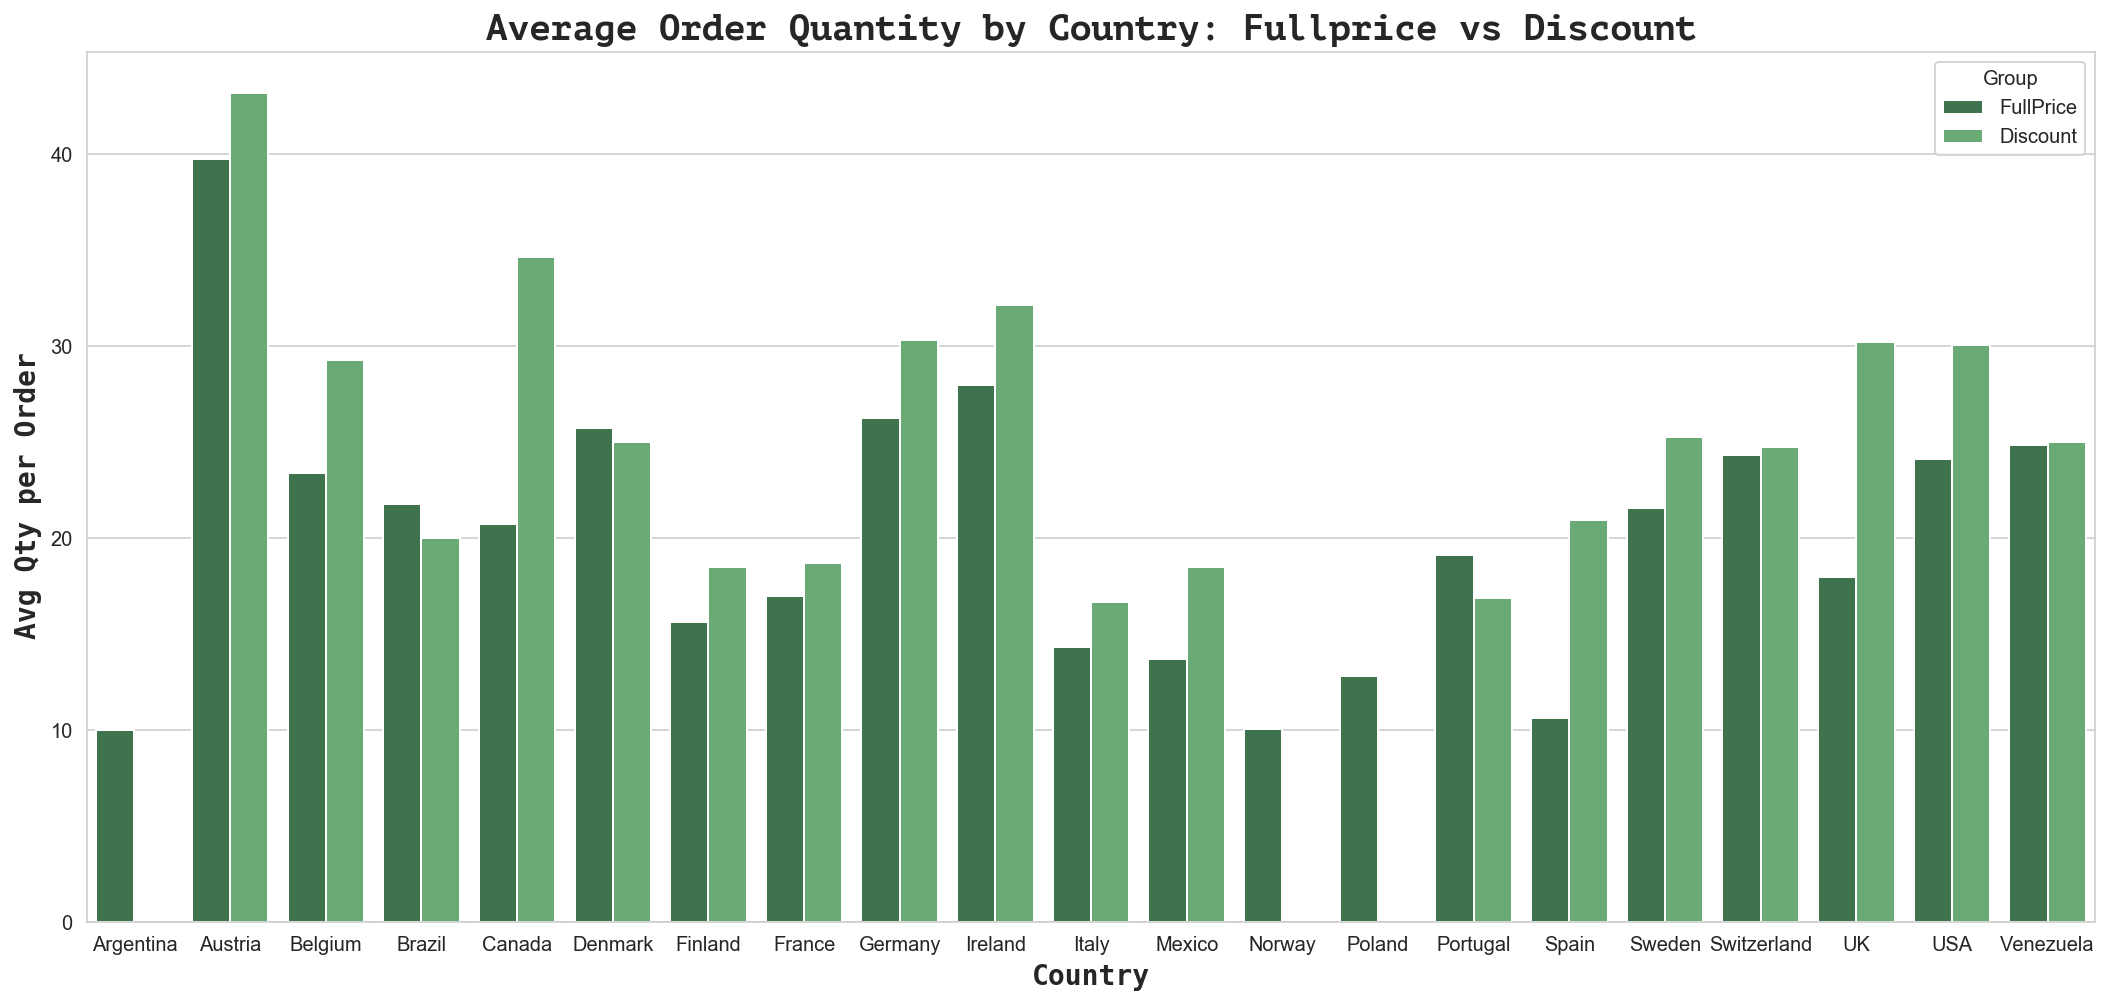

In [45]:
# Compare number of discount vs fullprice orders by country.
# Create bar plots grouped as discount vs fullprice orders by country
#fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18,8))

#q1 = "SELECT ShipCountry, Count(*) as NumOrders, SUM(Quantity) as TotalQty, AVG(Quantity) as MeanQPO from df_countries where discounted = 0 group by 1;"
#q2 = "SELECT ShipCountry, Count(*) as NumOrders, SUM(Quantity) as TotalQty, AVG(Quantity) as MeanQPO from df_countries where discounted = 1 group by 1;"

q1 = "SELECT ShipCountry, AVG(Quantity) as MeanQPO from df_countries where discounted = 0 group by 1;"
q2 = "SELECT ShipCountry, AVG(Quantity) as MeanQPO from df_countries where discounted = 1 group by 1;"

fullprice_df = pysqldf(q1)
discount_df = pysqldf(q2)

fullprice_df['Group'] = 'FullPrice'
discount_df['Group'] = 'Discount'

country_df = pd.concat([fullprice_df, discount_df], axis=0)

display(country_df.describe())

#ax = sns.barplot(x='ShipCountry', y='NumOrders', data=country_df, hue='Group', palette='pastel', orient='v')
#ax.set_title('Number of Fullprice vs Discount Orders by Country', fontdict={'family': 'monospace', 'size':16})

#ax1 = sns.barplot(x='ShipCountry', y='TotalQty', data=country_df, hue='Group', palette='pastel', orient='v')
#ax1.set_title('Total Qty of Fullprice vs Discount Orders by Country', fontdict={'family': 'monospace', 'size':16})


fig = plt.figure(figsize=(18,8))
ax = fig.gca(title="Mean QPO by Country")

sns.barplot(x='ShipCountry', y='MeanQPO', ax=ax, data=country_df, hue='Group', palette='Greens_d', 
            orient='v', capsize=.2)

## Set Title,X/Y Labels,fonts,formatting
ax_font = {'family':'monospace','weight':'semibold','size':14}
tick_font = {'size':12,'ha':'center','rotation':45}
t_label = "Average Order Quantity by Country: Fullprice vs Discount"
t_font = {'family': 'PT Mono', 'size':18}

ax.set_ylabel("Avg Qty per Order ", fontdict=ax_font)
ax.set_xlabel("Country", fontdict=ax_font)
#ax.set_title('Average Order Quantity by Country: Fullprice vs Discount', fontdict={'family': 'PT Mono', 'size':16})
ax.set_title(t_label, fontdict=t_font)


The above plots indicate that when a discount is offered, certain countries order higher quantities of products. Let's look at the values to determine what percentage more they purchase when an order is discounted.

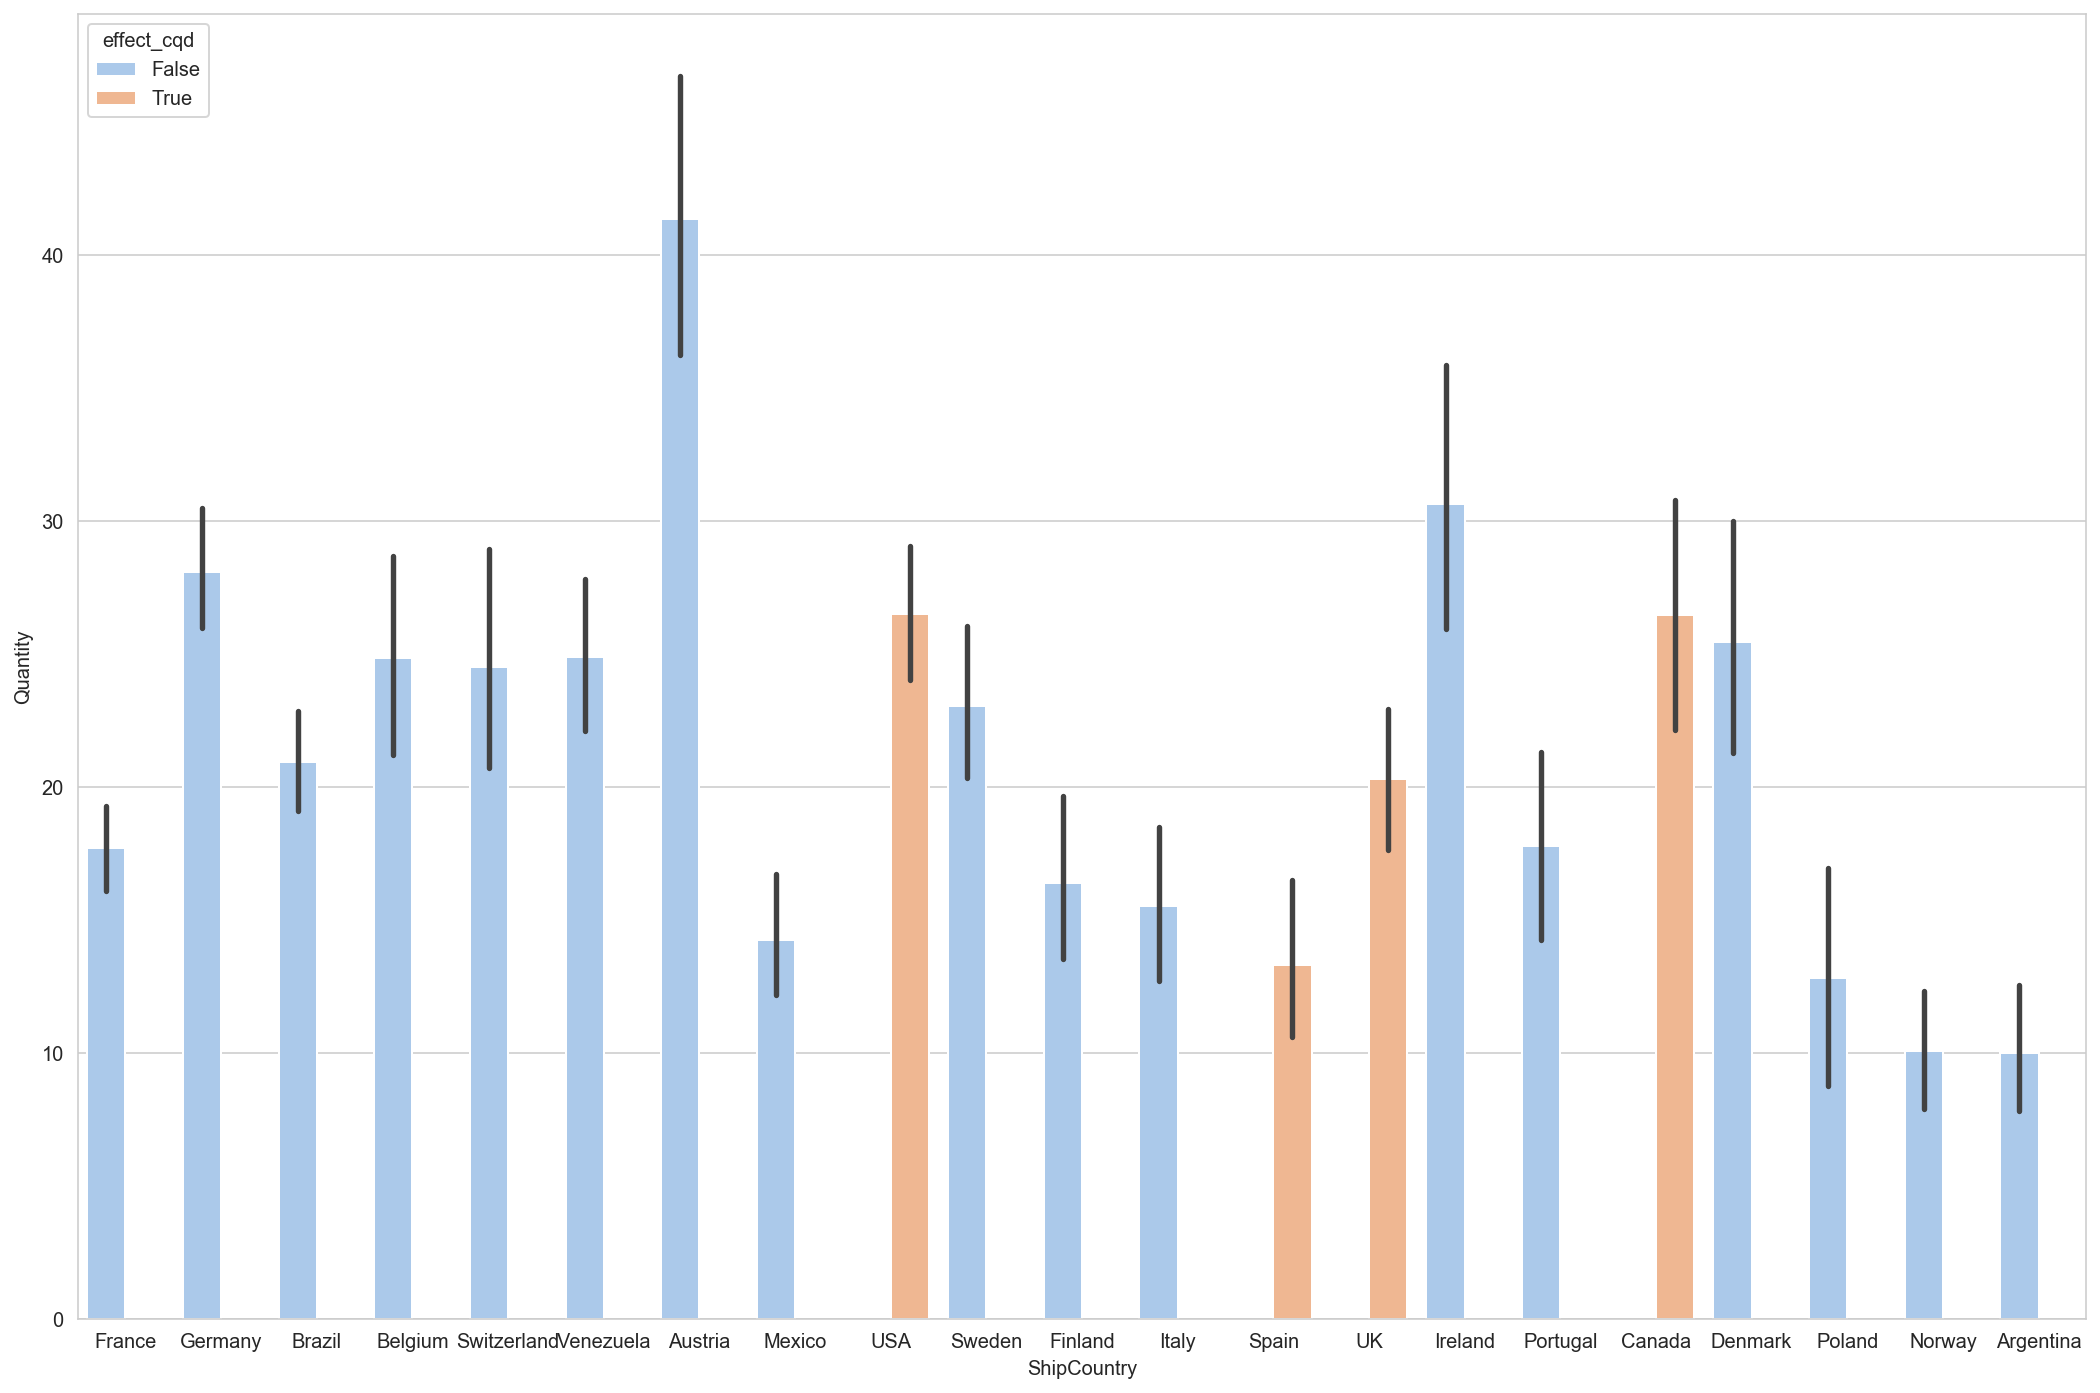

In [46]:
# add new col for countries where discount has significant effect
fig = plt.figure(figsize=(18,12))
ax = fig.gca()
df_countries['effect_cqd'] = df_countries['ShipCountry'].isin(['Spain', 'UK', 'USA', 'Canada'])
ax = sns.barplot(x='ShipCountry', y='Quantity', hue='effect_cqd', palette='pastel', data=df_countries)


Text(0.5, 1.0, 'Order Count by Country')

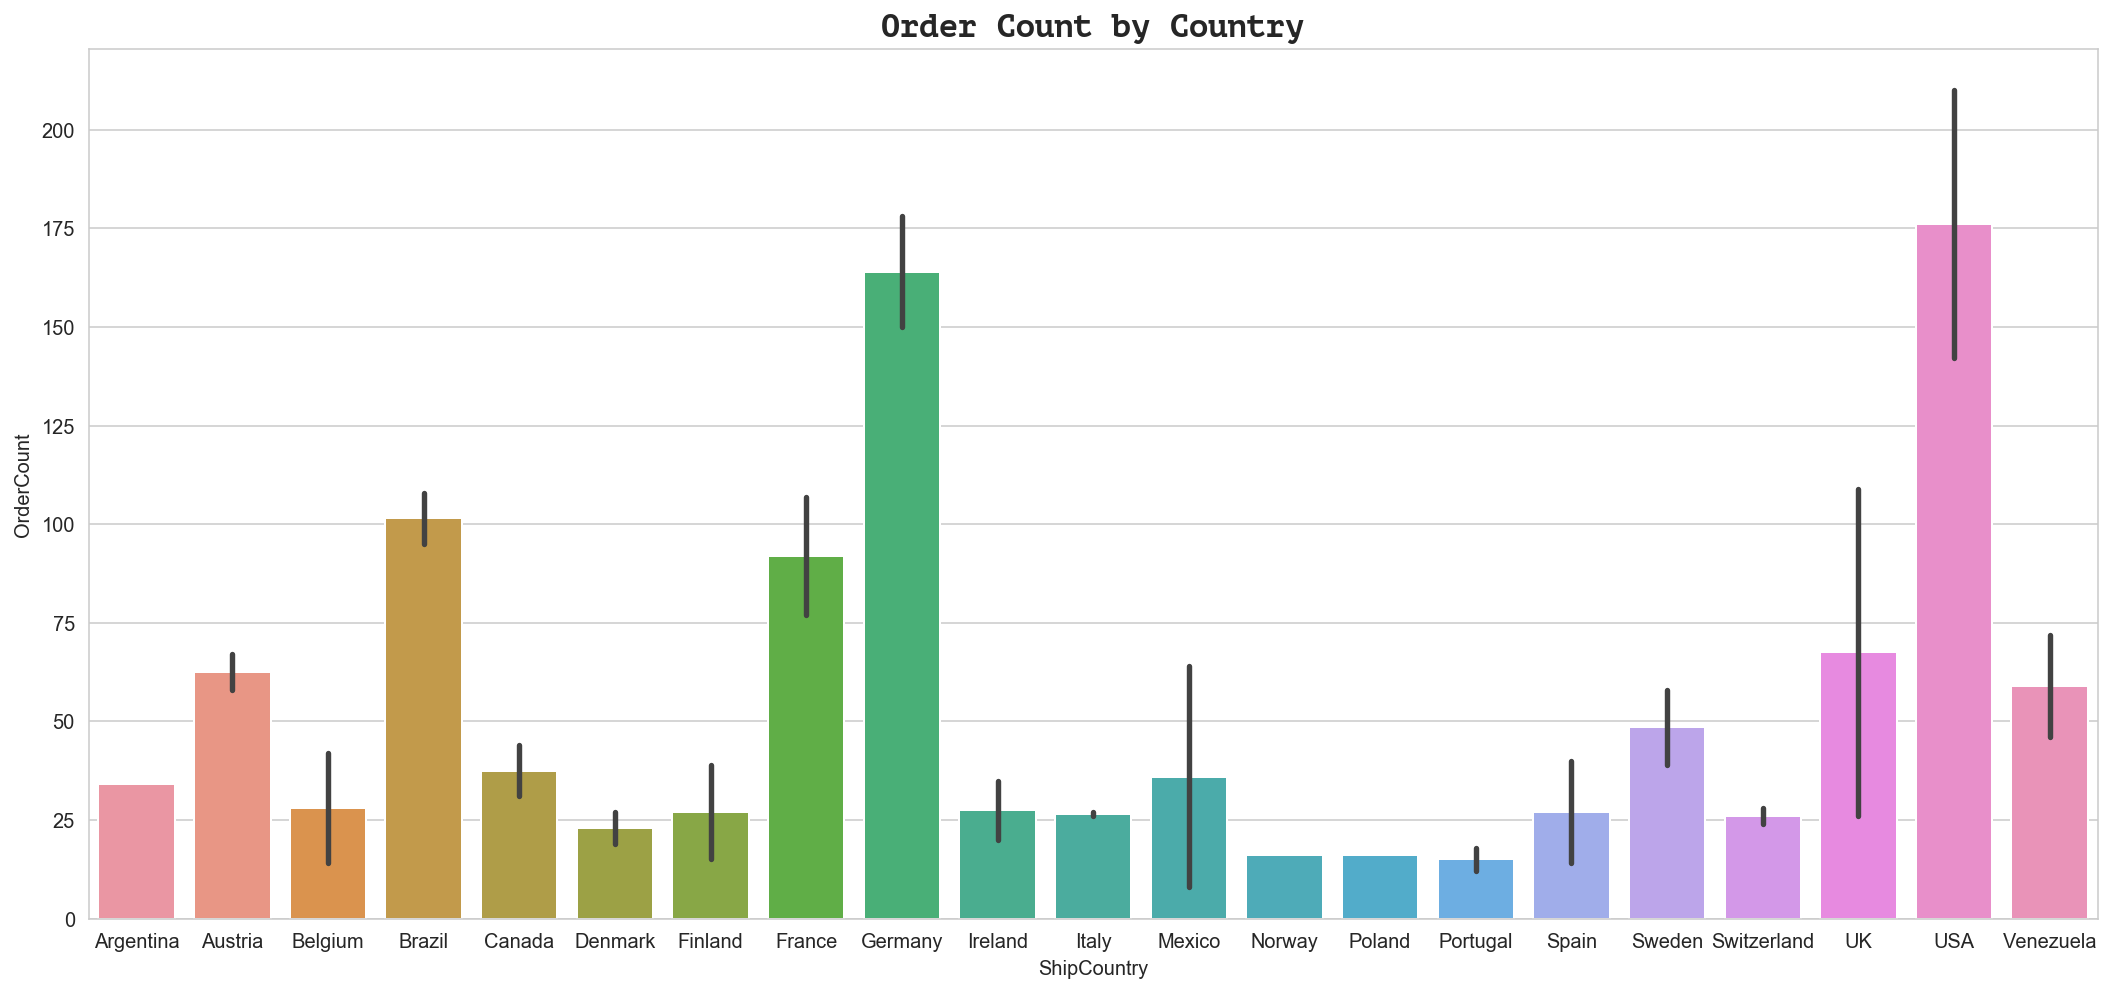

In [47]:
q1 = "SELECT ShipCountry, Count(*) as OrderCount from df_countries where discounted = 0 group by 1;"
q2 = "SELECT ShipCountry, Count(*) as OrderCount from df_countries where discounted = 1 group by 1;"

df_fpCount = pysqldf(q1)
df_dcCount = pysqldf(q2)

df_fpCount['Group'] = 'FullPrice'
df_dcCount['Group'] = 'Discount'

df_countryCount = pd.concat([df_fpCount, df_dcCount])

fig = plt.figure(figsize=(18,8))
ax = fig.gca(title="Average Order Quantity by Country")

ax = sns.barplot(x='ShipCountry', y='OrderCount', data=df_countryCount)
ax.set_title('Order Count by Country', fontdict={'family': 'PT Mono', 'size':16})

## Results

For certain individual countries (Spain, Canada, UK, USA), the null hypothesis is rejected with 95% certainty (alpha=0.05) 

# H3: Region & Revenue

**Does average revenue per order vary between different customer regions?**

**If so, how do the regions rank in terms of average revenue per order?**

*Additional questions to explore:*
**Does geographic distance between distributor and shipcountry have an effect on order quantity?**
**Does shipping cost have an effect on order quantity?**

## Hypotheses

$H_0$ the average revenue per order is the same between different customer regions.

$H_1$ Alternate hypothesis: the average revenue per order is different (higher or lower) across different customer regions.

*The alpha level (i.e. the probability of rejecting the null hypothesis when it is true) is = 0.05.*

## EDA

Select the proper dataset for analysis, generate data groups for testing, perform EDA.

### Select

In [48]:
# Extract revenue per product per order
cur.execute("""SELECT c.Region, od.OrderId, od.Quantity, od.UnitPrice, od.Discount
FROM Customer c
JOIN 'Order' o ON c.Id = o.CustomerId
JOIN OrderDetail od USING(OrderId);""")
df = pd.DataFrame(cur.fetchall())
df. columns = [i[0] for i in cur.description]
print(len(df))
df.head()

2078


,Region,OrderId,Quantity,UnitPrice,Discount
0,Western Europe,10248,12,14.0,0.0
1,Western Europe,10248,10,9.8,0.0
2,Western Europe,10248,5,34.8,0.0
3,Western Europe,10249,9,18.6,0.0
4,Western Europe,10249,40,42.4,0.0


In [49]:
# Get total revenue per order

df['Revenue'] = df.Quantity * df.UnitPrice * (1-df.Discount)

In [50]:
# Drop unnecessary columns
df.drop(['Quantity', 'UnitPrice', 'Discount'], axis=1, inplace=True)

### Group

In [51]:
# Group data by order and get average revenue per order for each region
df_region = df.groupby(['Region', 'OrderId'])['Revenue'].mean().reset_index()
# drop Order Id (no longer necessary)
df_region.drop('OrderId', axis=1, inplace=True)
# check changes
df_region.head()

,Region,Revenue
0,British Isles,239.70
1,British Isles,661.25
2,British Isles,352.40
3,British Isles,258.40
4,British Isles,120.20


In [52]:
# Explore sample sizes before testing: n > 30 to pass assumptions
df_region.groupby('Region').count()

,Revenue
Region,
British Isles,75
Central America,21
Eastern Europe,7
North America,152
Northern Europe,55
Scandinavia,28
South America,127
Southern Europe,64
Western Europe,272


Some of the sample sizes are too small to ignore assumptions of normality. We can combine some regions to meet the required threshold of n > 30.

In [53]:
# Group sub-regions together to create sample sizes adequately large for ANOVA testing  (min 30)

# Group Scandinavia, Northern and Eastern Europe
df_region.loc[(df_region.Region == 'Scandinavia') | (df_region.Region == 'Eastern Europe') | (df_region.Region == 'Northern Europe'), 'Region'] = 'North Europe'

# Group South and Central America
df_region.loc[(df_region.Region == 'South America') | (df_region.Region == 'Central America'), 'Region'] = 'South Americas'

# Review sizes of new groups
df_region.groupby('Region').count()

,Revenue
Region,
British Isles,75
North America,152
North Europe,90
South Americas,148
Southern Europe,64
Western Europe,272


### Explore

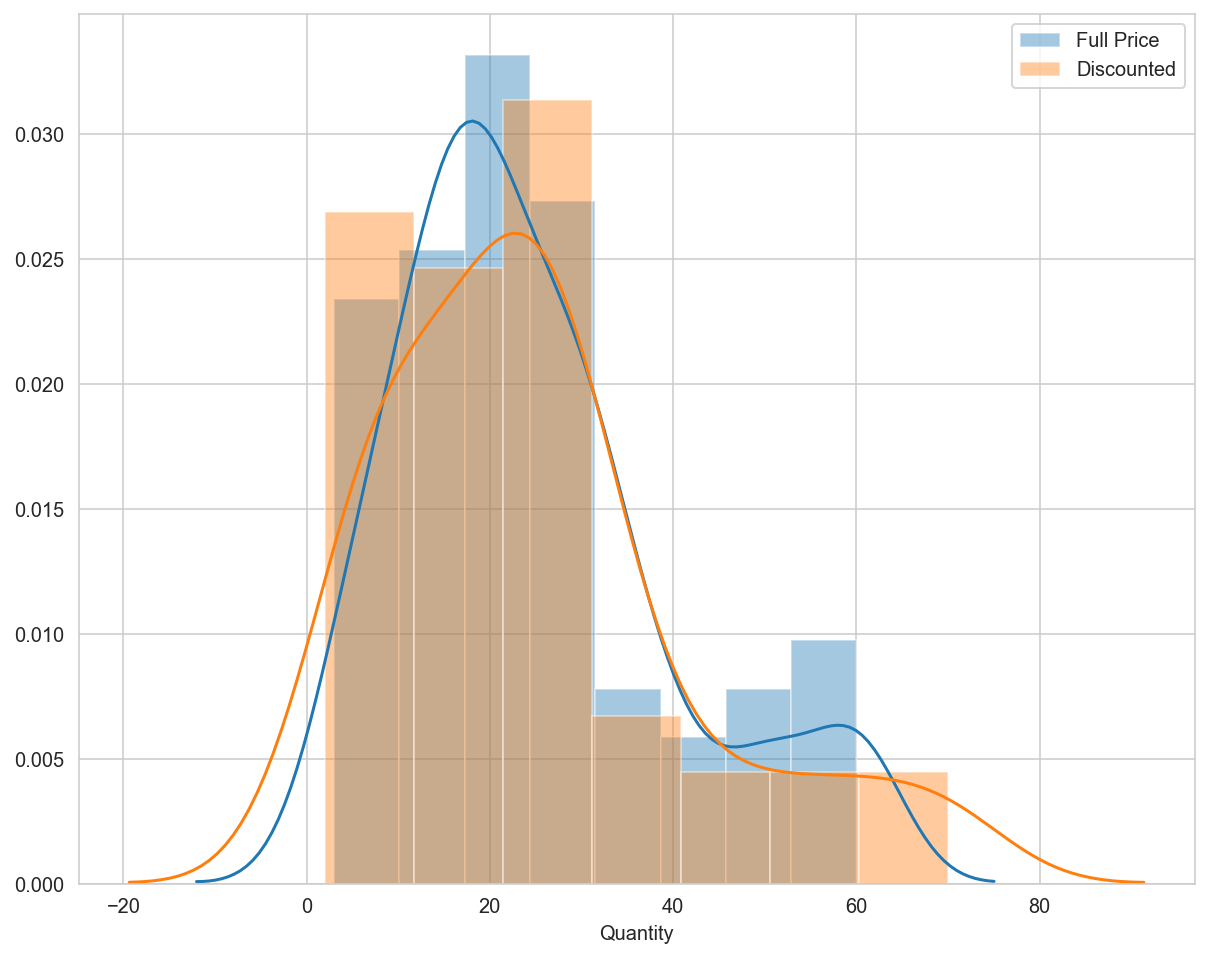

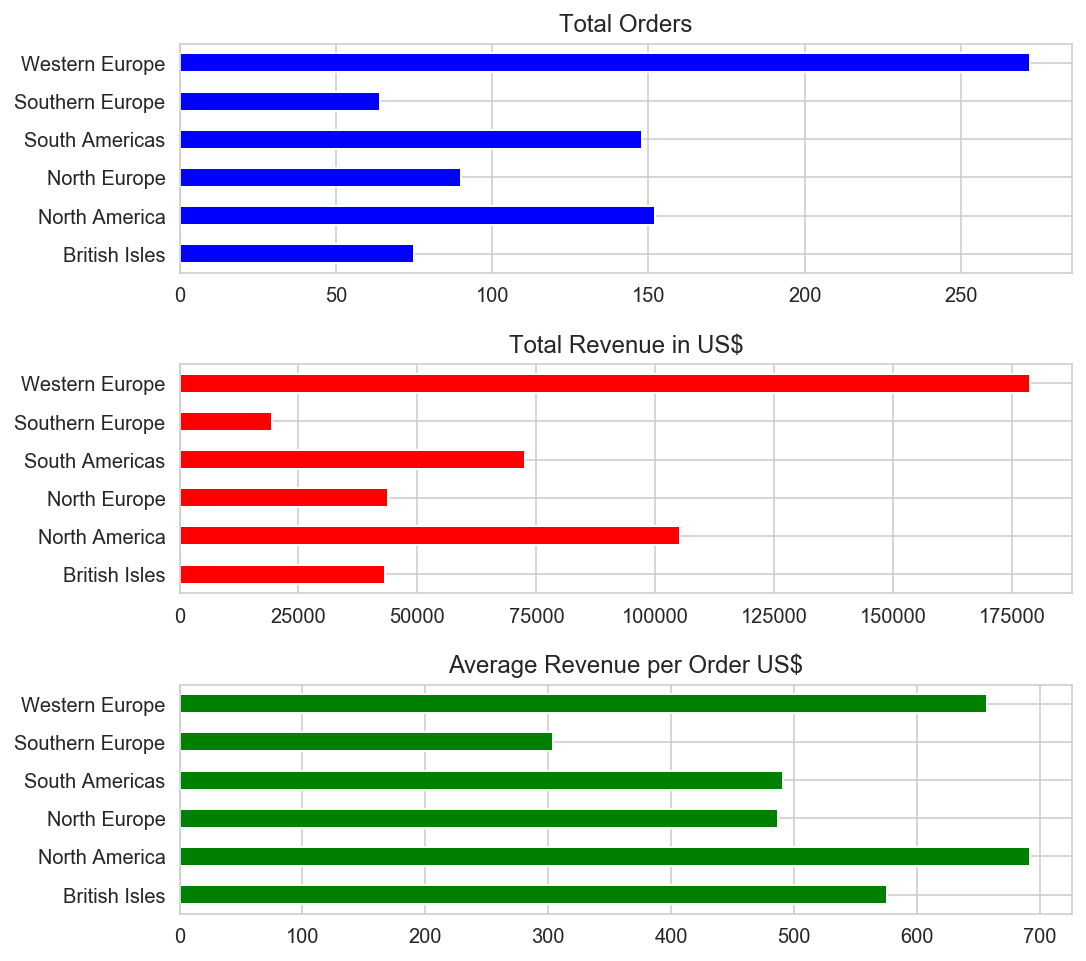

In [54]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()

sns.distplot(grp0)
sns.distplot(grp1)
ax.legend(['Full Price','Discounted'])

# Plot number of orders, total revenue, and average revenue per order by region
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8,8))
# Number of orders
df_region.groupby(['Region'])['Revenue'].count().plot(kind='barh', ax=ax1, color='b')

# Total Revenue
df_region.groupby(['Region'])['Revenue'].sum().plot(kind='barh', ax=ax2, color='r')

# Average Revenue
df_region.groupby(['Region'])['Revenue'].mean().plot(kind='barh', ax=ax3, color='g')

# Label plots and axes
ax1.set_title('Total Orders')
ax1.set_ylabel('')
ax2.set_title('Total Revenue in US$')
ax2.set_ylabel('')
ax3.set_title('Average Revenue per Order US$')
ax3.set_ylabel('')

fig.subplots_adjust(hspace=0.4);

The graphs show that Western Europe is the region with the greatest number of orders, and also has the greatest total revenue. However, North America has the most expensive order on average (followed by Western Europe). Southern and Eastern Europe has the lowest number of orders, lowest total revenue, and cheapest order on average. The third graph lent support to the alternate hypothesis that there are significant differences in average order revenue between regions. 

## Test

### Sample Size
Check if sample sizes allow us to ignore assumptions of normality

Text(0.5, 1.0, 'Average Order Revenue by Region')

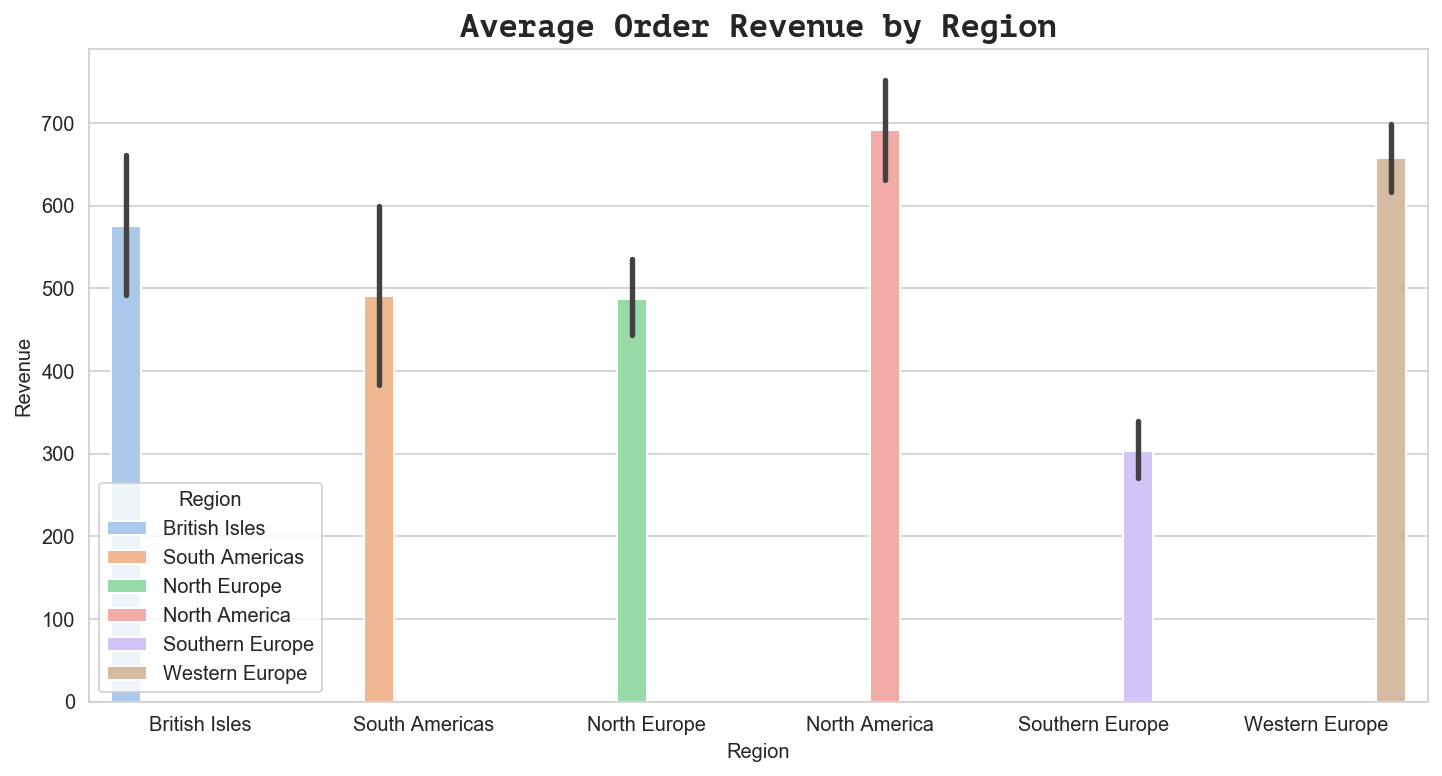

In [55]:
# visualize sample size comparisons, check normality (pvals)
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax = sns.barplot(x='Region', y='Revenue', data=df_region, ci=68, palette="pastel", hue='Region')
ax.set_title('Average Order Revenue by Region', fontdict={'family': 'PT Mono', 'size':16})

### Normality

### Statistical

In [56]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols("Revenue~C(Region)+Revenue:C(Region)", data=df_region).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
# reformat scientific notation of results for easier interpretation
anova_table.style.format("{:.5f}", subset=['PR(>F)'])

,sum_sq,df,F,PR(>F)
C(Region),1.03486e+07,5,3.98262e+30,0.00000
Revenue:C(Region),5.34162e+08,6,1.71309e+32,0.00000
Residual,4.10034e-22,789,nan,nan


In [57]:
# run tukey test for OQD (Order Quantity Discount) 
data = df_region['Revenue'].values
labels = df_region['Region'].values

import statsmodels.api as sms
model = sms.stats.multicomp.pairwise_tukeyhsd(data,labels)

# save OQD tukey test model results into dataframe (OQD: order quantity discount)
tukey_OQD = pd.DataFrame(data=model._results_table[1:], columns=model._results_table[0])
tukey_OQD

,group1,group2,meandiff,p-adj,lower,upper,reject
0,British Isles,North America,116.4615,0.9,-213.9625,446.8854,False
1,British Isles,North Europe,-88.1693,0.9,-454.2704,277.9318,False
2,British Isles,South Americas,-84.2501,0.9,-416.146,247.6458,False
3,British Isles,Southern Europe,-271.7815,0.3745,-670.2535,126.6904,False
4,British Isles,Western Europe,81.6889,0.9,-223.7052,387.083,False
5,North America,North Europe,-204.6308,0.4191,-516.0716,106.8101,False
6,North America,South Americas,-200.7115,0.2778,-471.1191,69.6961,False
7,North America,Southern Europe,-388.243,0.0191,-737.1631,-39.3228,True
8,North America,Western Europe,-34.7725,0.9,-271.9032,202.3581,False
9,North Europe,South Americas,3.9193,0.9,-309.0829,316.9214,False


North America and Southern Europe:  pval = 0.01, mean diff: -388.24

Southern Europe and Western Europe: pval = 0.02, mean diff: 353.4704

### Effect Size

Cohen's D

In [58]:
northamerica = df_region.loc[df_region['Region'] == 'North America']
southerneurope = df_region.loc[df_region['Region'] == 'Southern Europe']
westerneurope = df_region.loc[df_region['Region'] == 'Western Europe']

na_se = Cohen_d(northamerica.Revenue, southerneurope.Revenue)
se_we = Cohen_d(southerneurope.Revenue, westerneurope.Revenue)

print(na_se, se_we)

0.5891669383438923 -0.5462384714677272


## Post-Hoc Tests

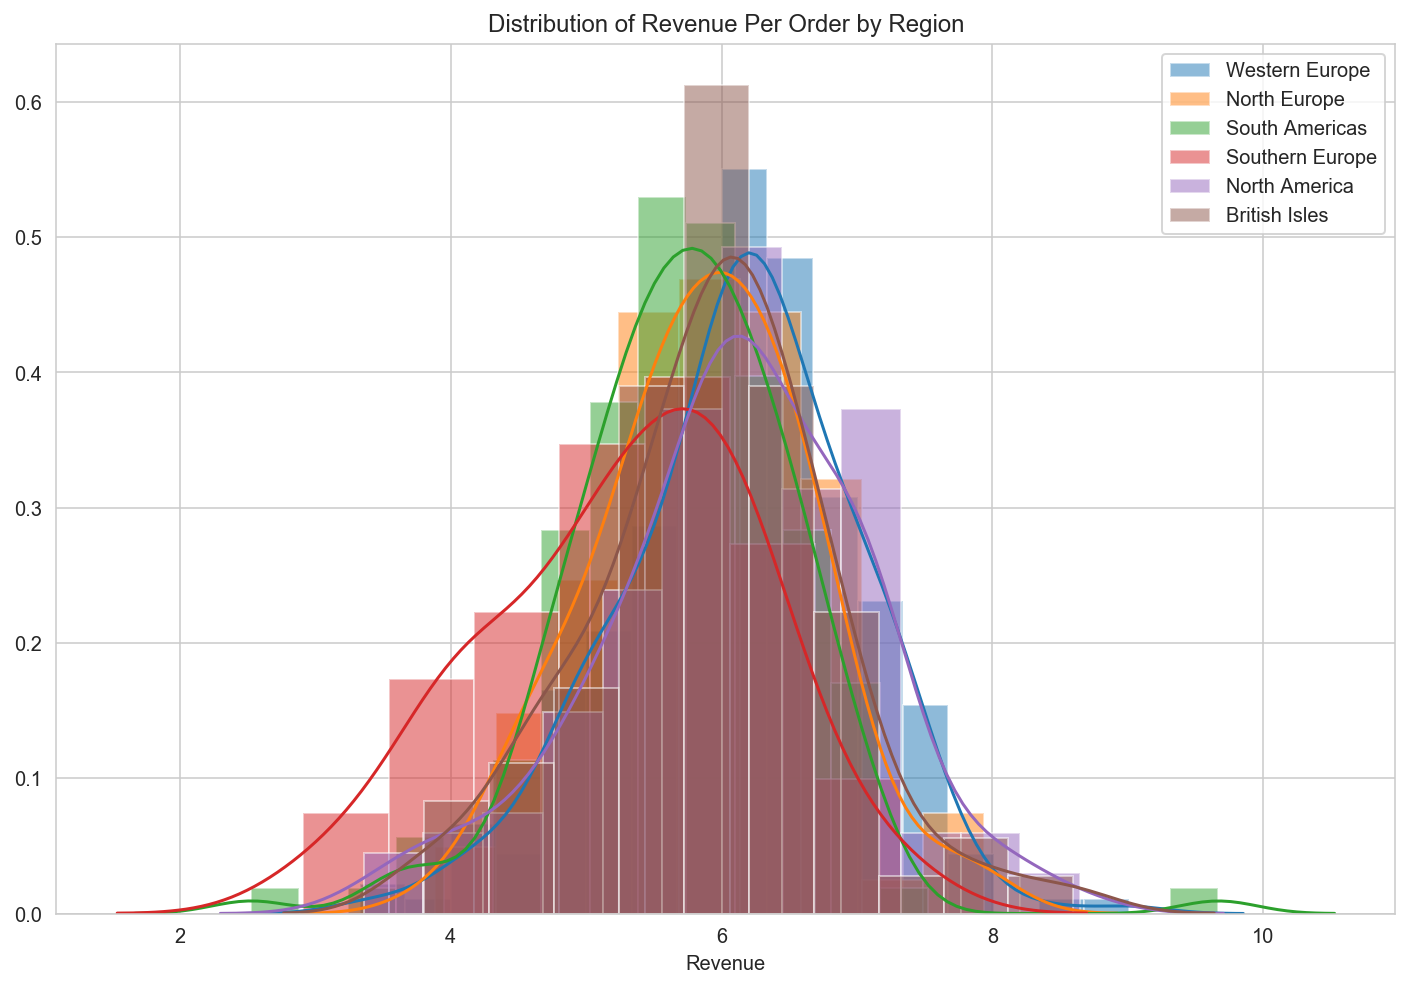

In [59]:
# log-transforming revenue per order
logRegion_df = df_region.copy()
logRegion_df['Revenue'] = np.log(df_region['Revenue'])

# Plotting the distributions for the log-transformed data
sns.set_style("whitegrid")

fig = plt.figure(figsize=(12,8))
ax = fig.gca(title="Distribution of Revenue Per Order by Region")

for region in set(logRegion_df.Region):
    region_group = logRegion_df.loc[logRegion_df['Region'] == region]
    sns.distplot(region_group['Revenue'], hist_kws=dict(alpha=0.5), label=region)
    ax.legend()
    ax.set_label('Revenue per Order (log-transformed)')

In [60]:
# The data is more normally distributed, and variances from the mean were more similar. 
# run an ANOVA test:

# Fitting a model of revenue per order on Region categories - ANOVA table
lm = ols('Revenue ~ C(Region)', logRegion_df).fit()
sm.stats.anova_lm(lm, typ=2)


,sum_sq,df,F,PR(>F)
C(Region),48.004167,5.0,12.076998,2.713885e-11
Residual,631.999979,795.0,NaN,NaN


## Results

At an alpha level of 0.05 significance, revenue does vary between regions and therefore the null hypothesis is rejected.



The ANOVA table above revealed that the p-value is lower than the alpha value of 0.05. Therefore I was able to reject the null hypothesis and accept the alternate hypothesis. There are statistically significant differences in average order value between different regions, i.e. customers from different parts of the world spend different amounts of money on their orders, on average.
Conclusions
Business insights:
There are statistically significant differences in the average revenue per order from customers from different regions.
Western European customers place the most orders, and are the single biggest contributors to Northwind’s bottom line. However, although North American customers have placed roughly half as many orders as those from Western Europe, they spend more per order, on average.
The difference between the region with the most expensive orders on average (North America, $1,945.93) and the region with the least expensive orders (Southern and Eastern Europe, $686.73) is $1,259.20, or 2.8 times more for orders from North America.
Southern and Eastern Europe has the smallest number of orders, the lowest total revenue, and the lowest average revenue per order.
North American customers have placed a similar number of orders to those from South and Central America, but their average expenditure per order is 1.8 times higher.
Potential business actions and directions for future work:
If Northwind was looking to focus on more profitable customers, a potential action would be to stop serving customers in Southern and Eastern Europe, and to focus more on customers in Western Europe and North America.
However, further analysis would be needed to confirm these findings. For example, it might be the case that some more expensive products are only available in certain regions.

---

# H4: Season+Quantity:ProductCategory

1: **Does time of year (month) have an effect on order quantity overall?**

2: **Does time of year (month) have an effect on order quantity of specific product categories?**

3: **Does time of year (month) have an effect on order quantity by region?**

## Hypotheses
    
* $𝐻_1$  : Time of year has a statistically significant effect on average quantity per order.

* $𝐻_0$ : Time of year has no relationship with average quantity per order.

## EDA
- Select proper dataset for analysis: orderDetail, order
- Generate data groups for testing: number of orders per month, order quantity per month
- Explore data (sample sizes, distribution/density)

### Select

In [66]:
df_months = df_orderDetail.merge(df_order, on='OrderId', copy=True)
df_months.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248/11,10248,11,14.0,12,0.0,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10248/42,10248,42,9.8,10,0.0,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
2,10248/72,10248,72,34.8,5,0.0,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
3,10249/14,10249,14,18.6,9,0.0,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
4,10249/51,10249,51,42.4,40,0.0,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany


In [67]:
pd.to_datetime(df_months['OrderDate'], format='%Y/%m/%d').head()

0   2012-07-04
1   2012-07-04
2   2012-07-04
3   2012-07-05
4   2012-07-05
Name: OrderDate, dtype: datetime64[ns]

In [68]:
df_months['OrderMonth'] = pd.DatetimeIndex(df_months['OrderDate']).month
df_months['OrderYear'] = pd.DatetimeIndex(df_months['OrderDate']).year
df_months.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,OrderMonth,OrderYear
0,10248/11,10248,11,14.0,12,0.0,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,7,2012
1,10248/42,10248,42,9.8,10,0.0,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,7,2012
2,10248/72,10248,72,34.8,5,0.0,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,7,2012
3,10249/14,10249,14,18.6,9,0.0,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany,7,2012
4,10249/51,10249,51,42.4,40,0.0,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany,7,2012


In [69]:
df_months.set_index('OrderDate', inplace=True)
df_months.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,CustomerId,EmployeeId,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,OrderMonth,OrderYear
OrderDate,,,,,,,,,,,,,,,,,,,,
2012-07-04,10248/11,10248,11,14.0,12,0.0,VINET,5,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,7,2012
2012-07-04,10248/42,10248,42,9.8,10,0.0,VINET,5,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,7,2012
2012-07-04,10248/72,10248,72,34.8,5,0.0,VINET,5,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,7,2012
2012-07-05,10249/14,10249,14,18.6,9,0.0,TOMSP,6,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany,7,2012
2012-07-05,10249/51,10249,51,42.4,40,0.0,TOMSP,6,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany,7,2012


### Group

In [71]:
# create seasonal-based dataframe with only columns we need
#keep_cols = ['OrderId', 'ProductId', 'UnitPrice', 'Quantity', 'ShipCountry', 'OrderMonth', 'OrderYear', 'Season']
drop_cols = ['OrderId', 'CustomerId', 'EmployeeId', 'Freight', 'RequiredDate', 'ShippedDate', 'ShipVia', 'ShipName', 'ShipAddress', 'ShipCity', 'ShipPostalCode']
df_monthly = df_months.copy()
df_monthly.drop(drop_cols, axis=1, inplace=True)
df_monthly.head()

,Id,ProductId,UnitPrice,Quantity,Discount,ShipRegion,ShipCountry,OrderMonth,OrderYear
OrderDate,,,,,,,,,
2012-07-04,10248/11,11,14.0,12,0.0,Western Europe,France,7,2012
2012-07-04,10248/42,42,9.8,10,0.0,Western Europe,France,7,2012
2012-07-04,10248/72,72,34.8,5,0.0,Western Europe,France,7,2012
2012-07-05,10249/14,14,18.6,9,0.0,Western Europe,Germany,7,2012
2012-07-05,10249/51,51,42.4,40,0.0,Western Europe,Germany,7,2012


In [83]:
meanqpo = df_monthly.groupby('OrderMonth')['Quantity'].mean()

OrderMonth
1    24.755274
2    26.104478
3    22.882353
4    25.256705
5    19.903226
Name: Quantity, dtype: float64

Text(0.5, 1.0, 'Average Order Qty by Month')

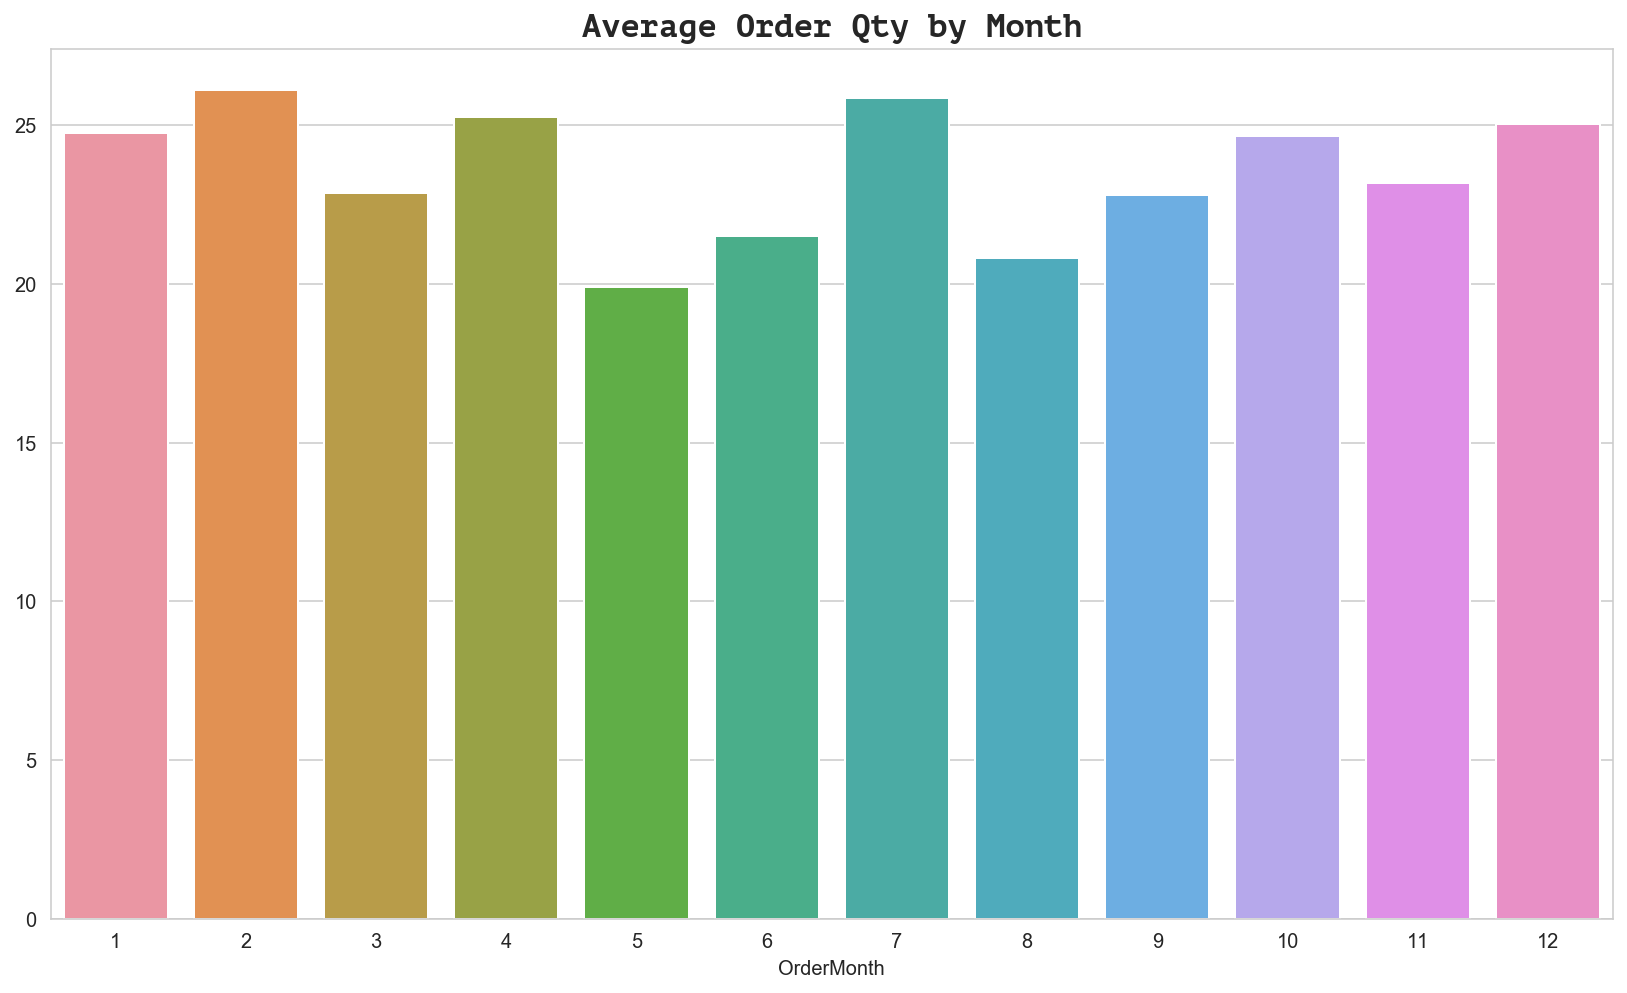

In [90]:
sns.set_style("whitegrid")
%config InlineBackend.figure_format='retina'
%matplotlib inline

x = meanqpo.index
y = meanqpo.values

# Check if sample sizes allow us to ignore assumptions;
# visualize sample size comparisons for two groups (normality check)
fig = plt.figure(figsize=(14,8))
ax = fig.gca()
ax = sns.barplot(x=x, y=y)
ax.set_title('Average Order Qty by Month', fontdict={'family': 'PT Mono', 'size':16})

### Explore

## Test

### Sample Size

Text(0.5, 1.0, 'Monthly Order Qty')

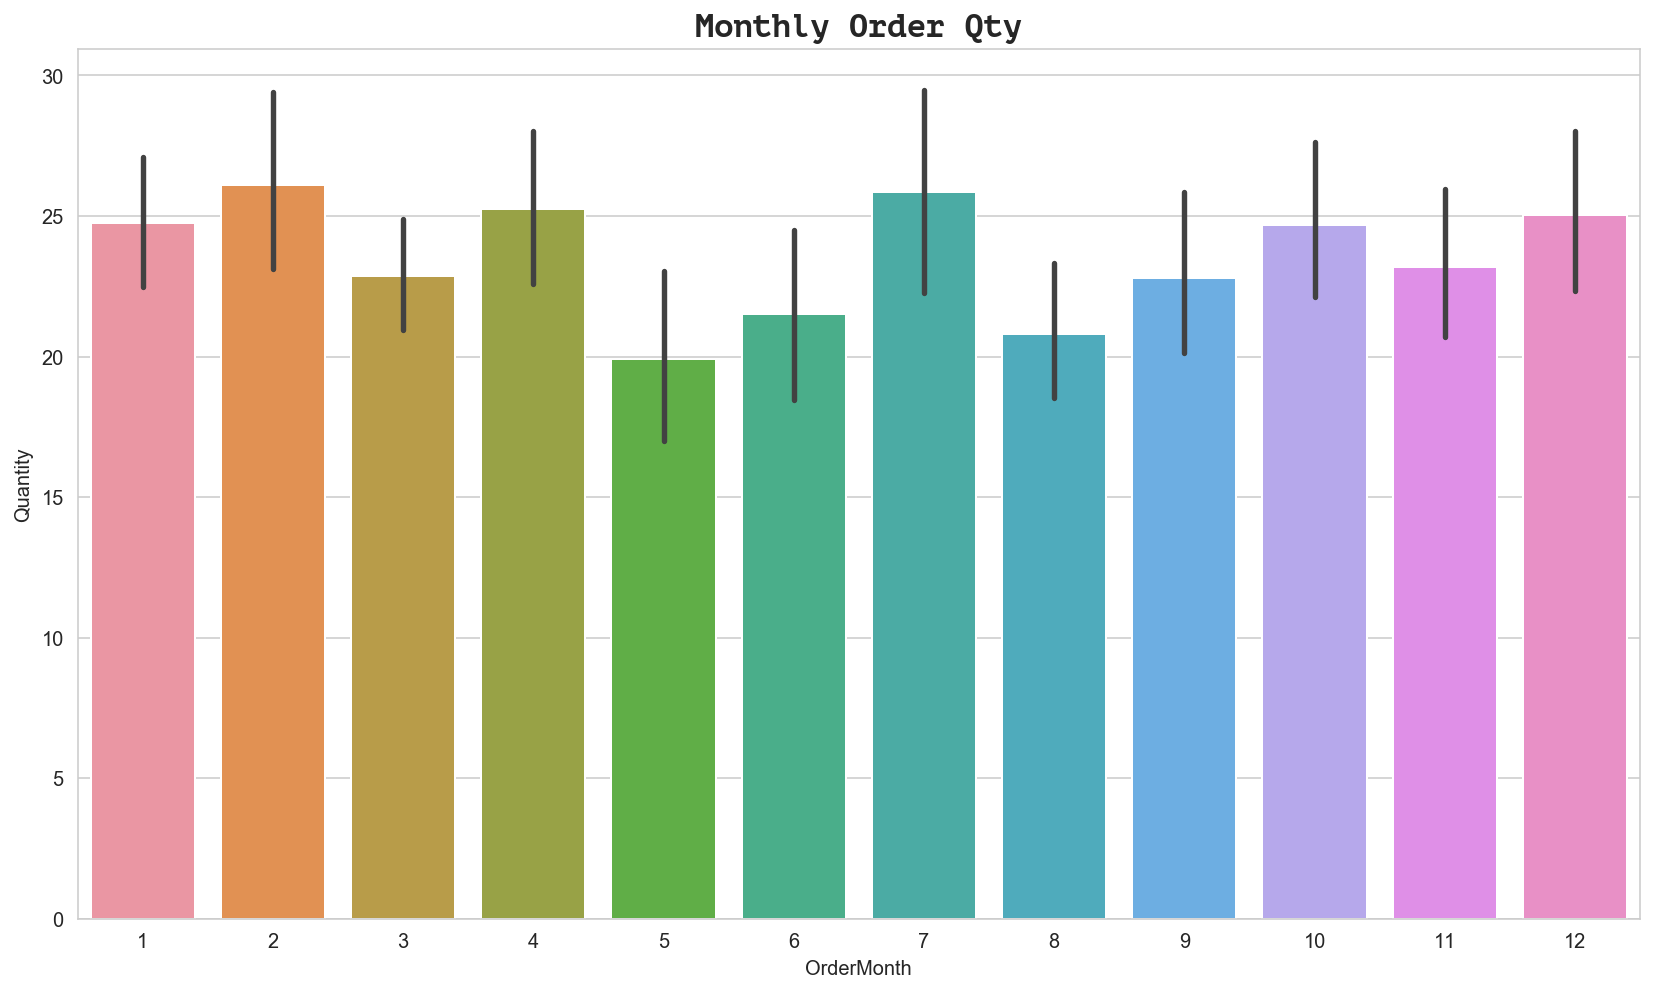

In [67]:
sns.set_style("whitegrid")
%config InlineBackend.figure_format='retina'
%matplotlib inline


# Check if sample sizes allow us to ignore assumptions;
# visualize sample size comparisons for two groups (normality check)
fig = plt.figure(figsize=(14,8))
ax = fig.gca()
ax = sns.barplot(x='OrderMonth', y='Quantity', data=df_monthly)
ax.set_title('Monthly Order Qty', fontdict={'family': 'PT Mono', 'size':16})



Text(0.5, 1.0, 'Monthly Order Qty')

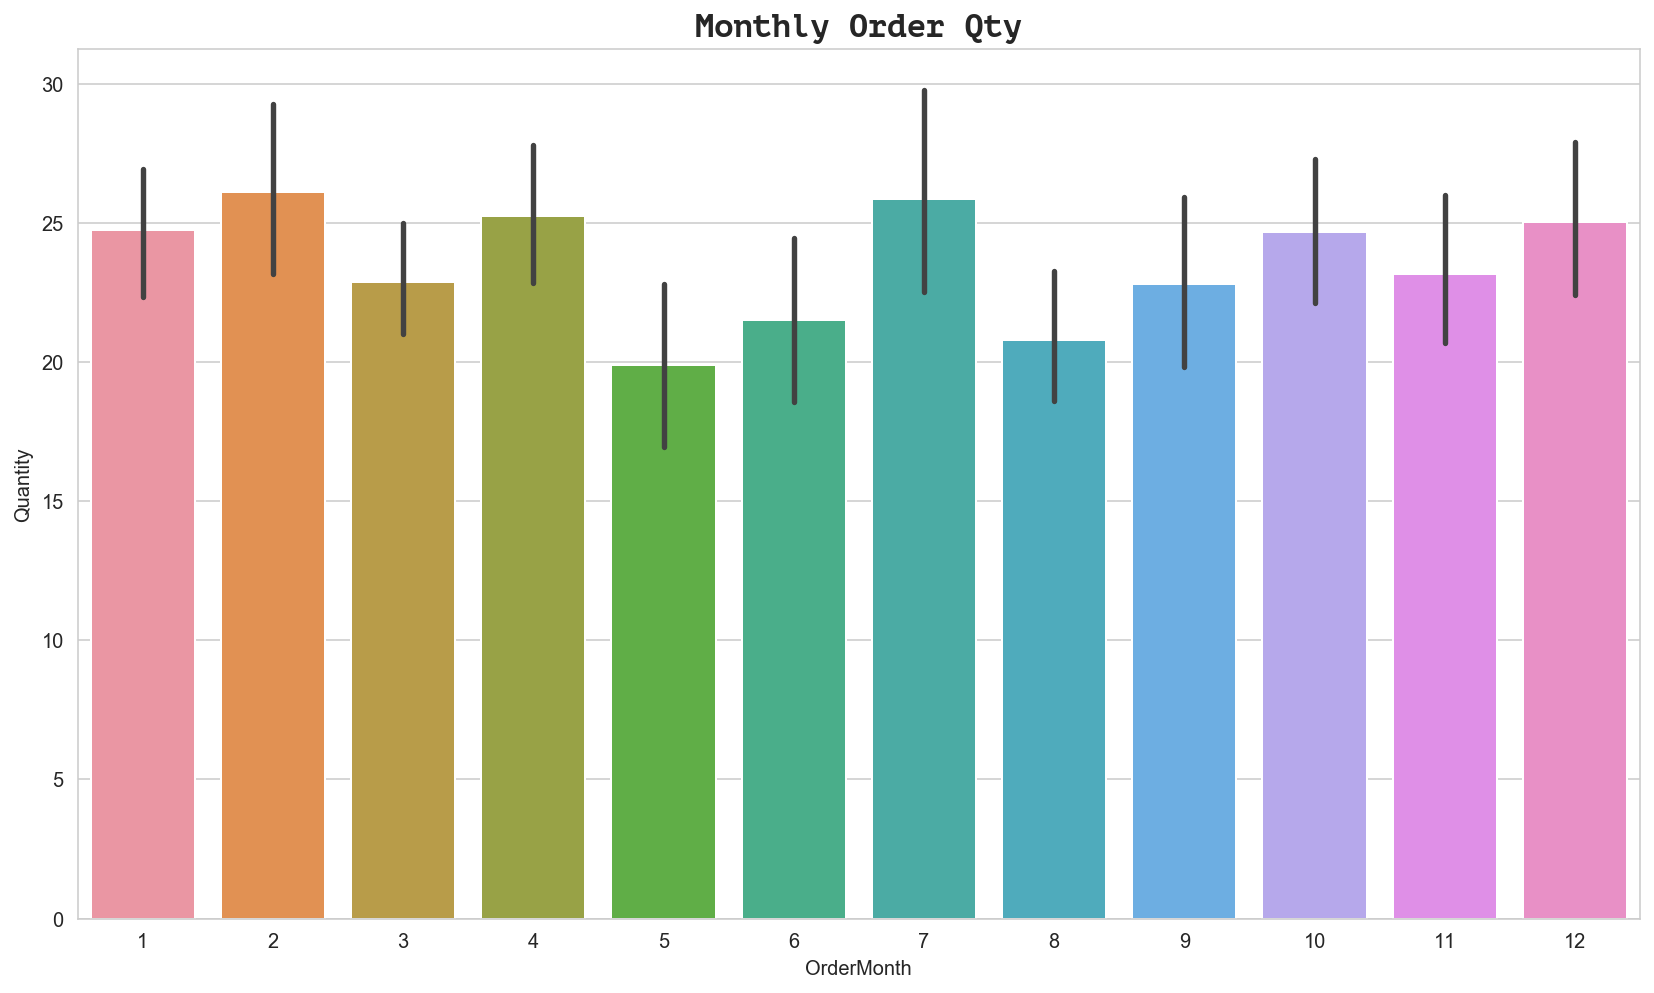

In [68]:
sns.set_style("whitegrid")
%config InlineBackend.figure_format='retina'
%matplotlib inline


# Check if sample sizes allow us to ignore assumptions;
# visualize sample size comparisons for two groups (normality check)
fig = plt.figure(figsize=(14,8))
ax = fig.gca()
ax = sns.barplot(x='OrderMonth', y='Quantity', data=df_monthly)
ax.set_title('Monthly Order Qty', fontdict={'family': 'PT Mono', 'size':16})



In [69]:
# Anova Test - Season + Quantity ()

import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols("Quantity~C(OrderMonth)+Quantity:C(OrderMonth)", data=df_monthly).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
# reformat scientific notation of results for easier interpretation
anova_table.style.format("{:.5f}", subset=['PR(>F)'])

,sum_sq,df,F,PR(>F)
C(OrderMonth),7395.98,11,2.94204e+29,0.00000
Quantity:C(OrderMonth),772004,12,2.81504e+31,0.00000
Residual,4.87009e-24,2131,nan,nan


### Normality

### Statistical

In [70]:
# split orders into two groups (series): discount and fullprice order quantity
Jan = df_monthly.groupby('OrderMonth').get_group(1)['Quantity']


In [71]:
# run tukey test for OQD (Order Quantity Discount) 
data = df_monthly['Quantity'].values
labels = df_monthly['OrderMonth'].values

import statsmodels.api as sms
model = sms.stats.multicomp.pairwise_tukeyhsd(data,labels)

# save OQD tukey test model results into dataframe (OQD: order quantity discount)
tukey_OQD = pd.DataFrame(data=model._results_table[1:], columns=model._results_table[0])
tukey_OQD

,group1,group2,meandiff,p-adj,lower,upper,reject
0,1,2,1.3492,0.9,-4.6052,7.3037,False
1,1,3,-1.8729,0.9,-7.4759,3.73,False
2,1,4,0.5014,0.9,-5.0704,6.0733,False
3,1,5,-4.852,0.358,-11.2668,1.5627,False
4,1,6,-3.2421,0.9,-11.428,4.9438,False
...,...,...,...,...,...,...,...
61,9,11,0.3585,0.9,-6.73,7.4471,False
62,9,12,2.2267,0.9,-4.4923,8.9457,False
63,10,11,-1.5082,0.9,-8.3215,5.3051,False
64,10,12,0.3599,0.9,-6.068,6.7878,False


## Results

At a significance level of alpha = 0.05, we reject the null hypothesis which states there is no relationship between time of year (season) and sales revenue or volume of units sold. 

# Conclusion + Strategic Recommendations

- Conclusion & Strategic Recommendations
    1. 5% is the minimum discount level needed to produce maximum results. 
    - C: Offering discount levels < or > 5% either:
        a) has no effect on sales revenue and is therefore pointless
        b) increases loss in revenue despite higher order quantities that could have otherwise been achieved at only 5% discount (thereby maximizing revenue capture/minimizing loss).
    - R: Stop offering any discount other than 5%. 
    
    2. Continue to offer discounts in countries where they are effective in producing significantly higher order quantities. Stop offering discounts to countries where there is no effect on order quantities in order to minimize lost revenue. 
    
    3. Focus sales and marketing efforts in regions that produce highest revenue; consider  
    
    4.  


- Future Work
    * A. Gather and analyze critical missing data on customer types; investigate possible relationships between customer types and product categories (i.e. do certain customer types purchase certain 
    * C. Investigate possible relationship between regional revenues and shipping cost (i.e. is there a relationship between source (distributor) and destination (shipcountry) that might explain lower revenues in regions that are farther away in physical/geographic distance. 

# Future Work

Questions to explore in future analyses might include:

1. Build a product recommendation tool

2. Create discounts or free shipping offers to increase sales volumes past a certain threshold.
- Shipping Costs and Order Quantities/Sales Revenue
*Does shipping cost (freight) have a statistically significant effect on quantity? If so, at what level(s) of shipping cost?*

3. Customer Type and Product Category

*Is there a relationship between type of customer and certain product categories? If so, we can run more highly targeted sales and marketing programs for increasing sales of certain products to certain market segments.* 



# metricks

1. What were the top 3 selling products overall?
2. Top 3 selling products by country?
3. Top 3 selling products by region?
4. How did we do in sales for each product category?
5. Can we group customers into customer types (fill the empty database) and build a product recommendation tool?

In [91]:
# Extract revenue per product category
cur.execute("""SELECT o.OrderId, o.CustomerId, od.ProductId, od.Quantity, od.UnitPrice, 
                od.Quantity*od.UnitPrice*(1-Discount) as Revenue, p.CategoryId, c.CategoryName
                FROM 'Order' o
                JOIN OrderDetail od 
                ON o.OrderId = od.OrderId
                JOIN Product p 
                ON od.ProductId = p.Id
                JOIN Category c
                ON p.CategoryId = c.Id
                ;""")
df = pd.DataFrame(cur.fetchall())
df.columns = [i[0] for i in cur.description]
print(len(df))
df.head(8)

2155


,OrderId,CustomerId,ProductId,Quantity,UnitPrice,Revenue,CategoryId,CategoryName
0,10248,VINET,11,12,14.0,168.0,4,Dairy Products
1,10248,VINET,42,10,9.8,98.0,5,Grains/Cereals
2,10248,VINET,72,5,34.8,174.0,4,Dairy Products
3,10249,TOMSP,14,9,18.6,167.4,7,Produce
4,10249,TOMSP,51,40,42.4,1696.0,7,Produce
5,10250,HANAR,41,10,7.7,77.0,8,Seafood
6,10250,HANAR,51,35,42.4,1261.4,7,Produce
7,10250,HANAR,65,15,16.8,214.2,2,Condiments


In [98]:
df.CategoryId.value_counts()

1    404
4    366
3    334
8    330
2    216
5    196
6    173
7    136
Name: CategoryId, dtype: int64

In [94]:
# Explore sample sizes before testing
categories = df.groupby('CategoryName').groups
categories.keys()

dict_keys(['Beverages', 'Condiments', 'Confections', 'Dairy Products', 'Grains/Cereals', 'Meat/Poultry', 'Produce', 'Seafood'])

In [97]:
# Group data by Category and get sum total revenue for each
df_category = df.groupby(['CategoryName'])['Revenue'].mean().reset_index()
df_category

,CategoryName,Revenue
0,Beverages,663.040050
1,Condiments,490.958727
2,Confections,501.069536
3,Dairy Products,640.730287
4,Grains/Cereals,488.492793
5,Meat/Poultry,942.325777
6,Produce,735.180735
7,Seafood,397.762841


In [99]:
df_category.loc[df_category['CategoryName'] == 'Beverages']['Revenue'].mean()

663.0400495049504

In [106]:
#create dict of months and order quantity totals
rev_per_cat = {}
avg_rev_cat = {}
for k,v in categories.items():
    sum_rev = df_category.loc[df_category['CategoryName'] == k]['Revenue'].sum()
    avg_rev = df_category.loc[df_category['CategoryName'] == k]['Revenue'].mean()
    
    rev_per_cat[k] = sum_rev
    avg_rev_cat[k] = avg_rev
    
rev_per_cat
avg_rev_cat

{'Beverages': 663.0400495049504,
 'Condiments': 490.95872685185196,
 'Confections': 501.0695359281436,
 'Dairy Products': 640.730286885246,
 'Grains/Cereals': 488.49279336734696,
 'Meat/Poultry': 942.3257774566473,
 'Produce': 735.1807352941175,
 'Seafood': 397.762840909091}

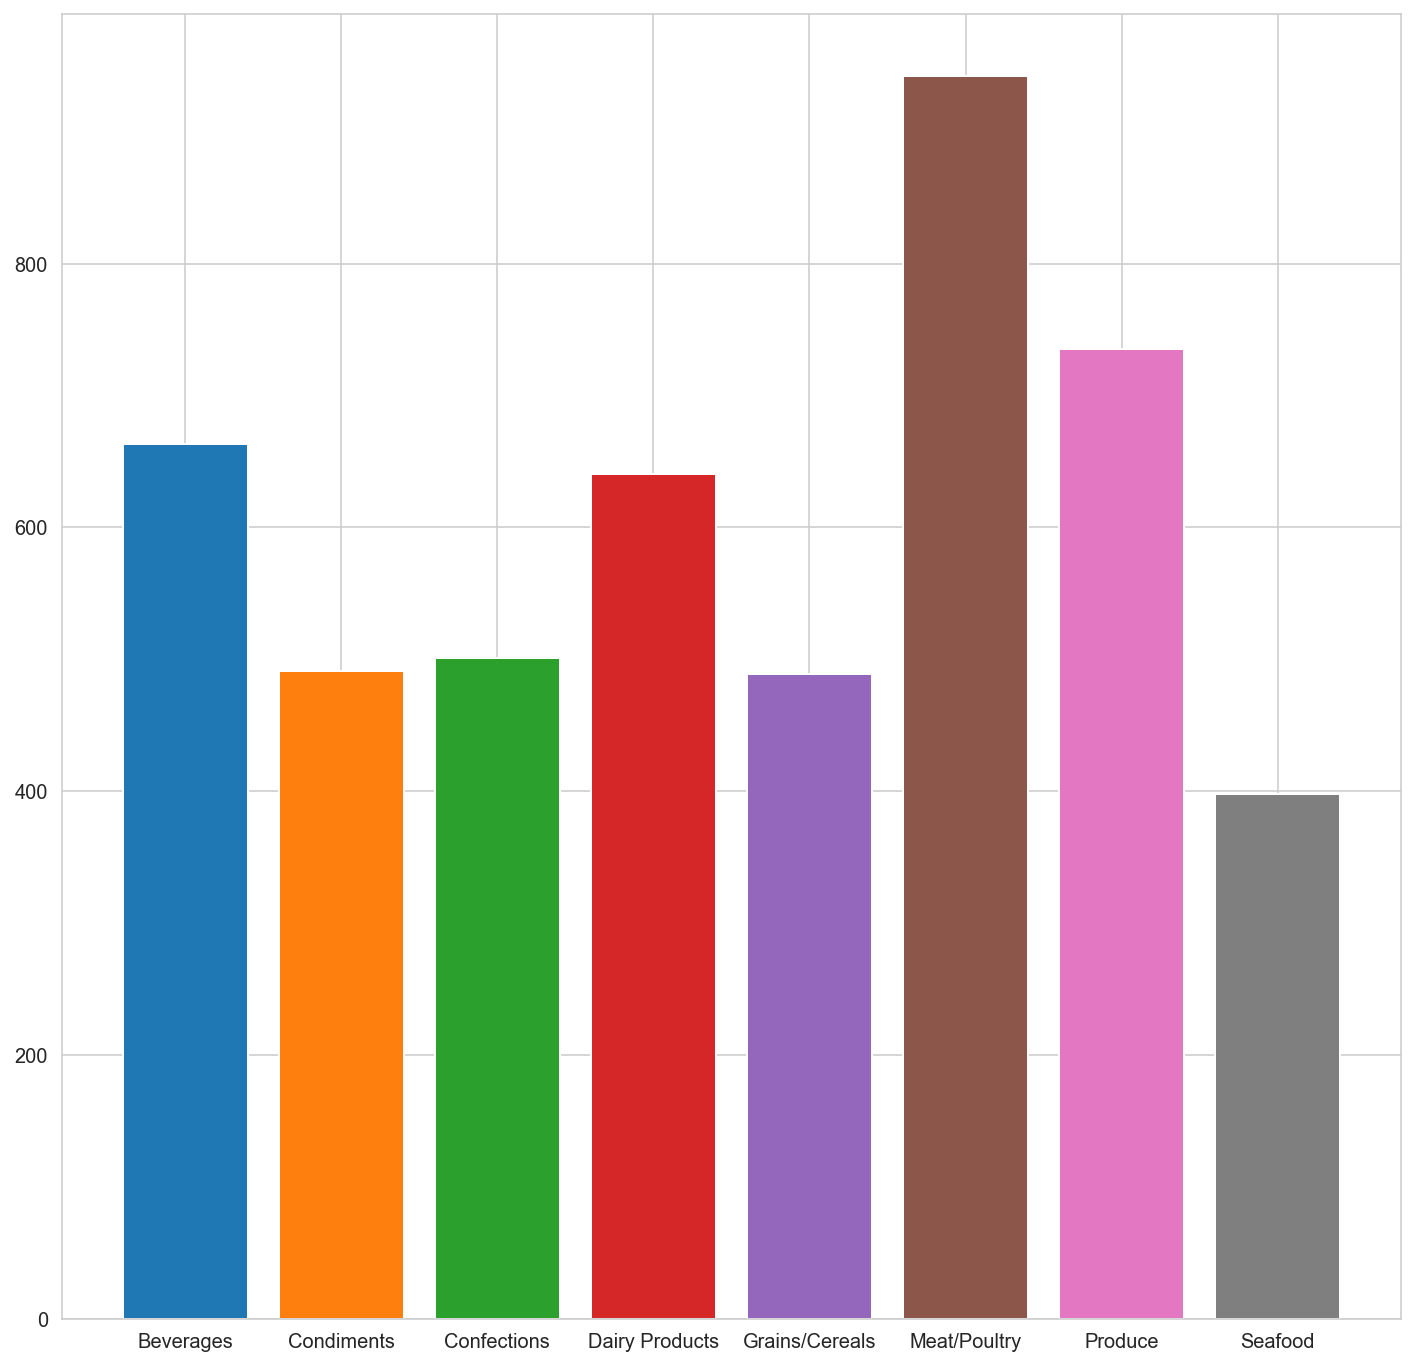

In [104]:
fig = plt.figure(figsize=(12,12))
for k,v in avg_rev_cat.items():
    plt.bar(x=k, height=v)

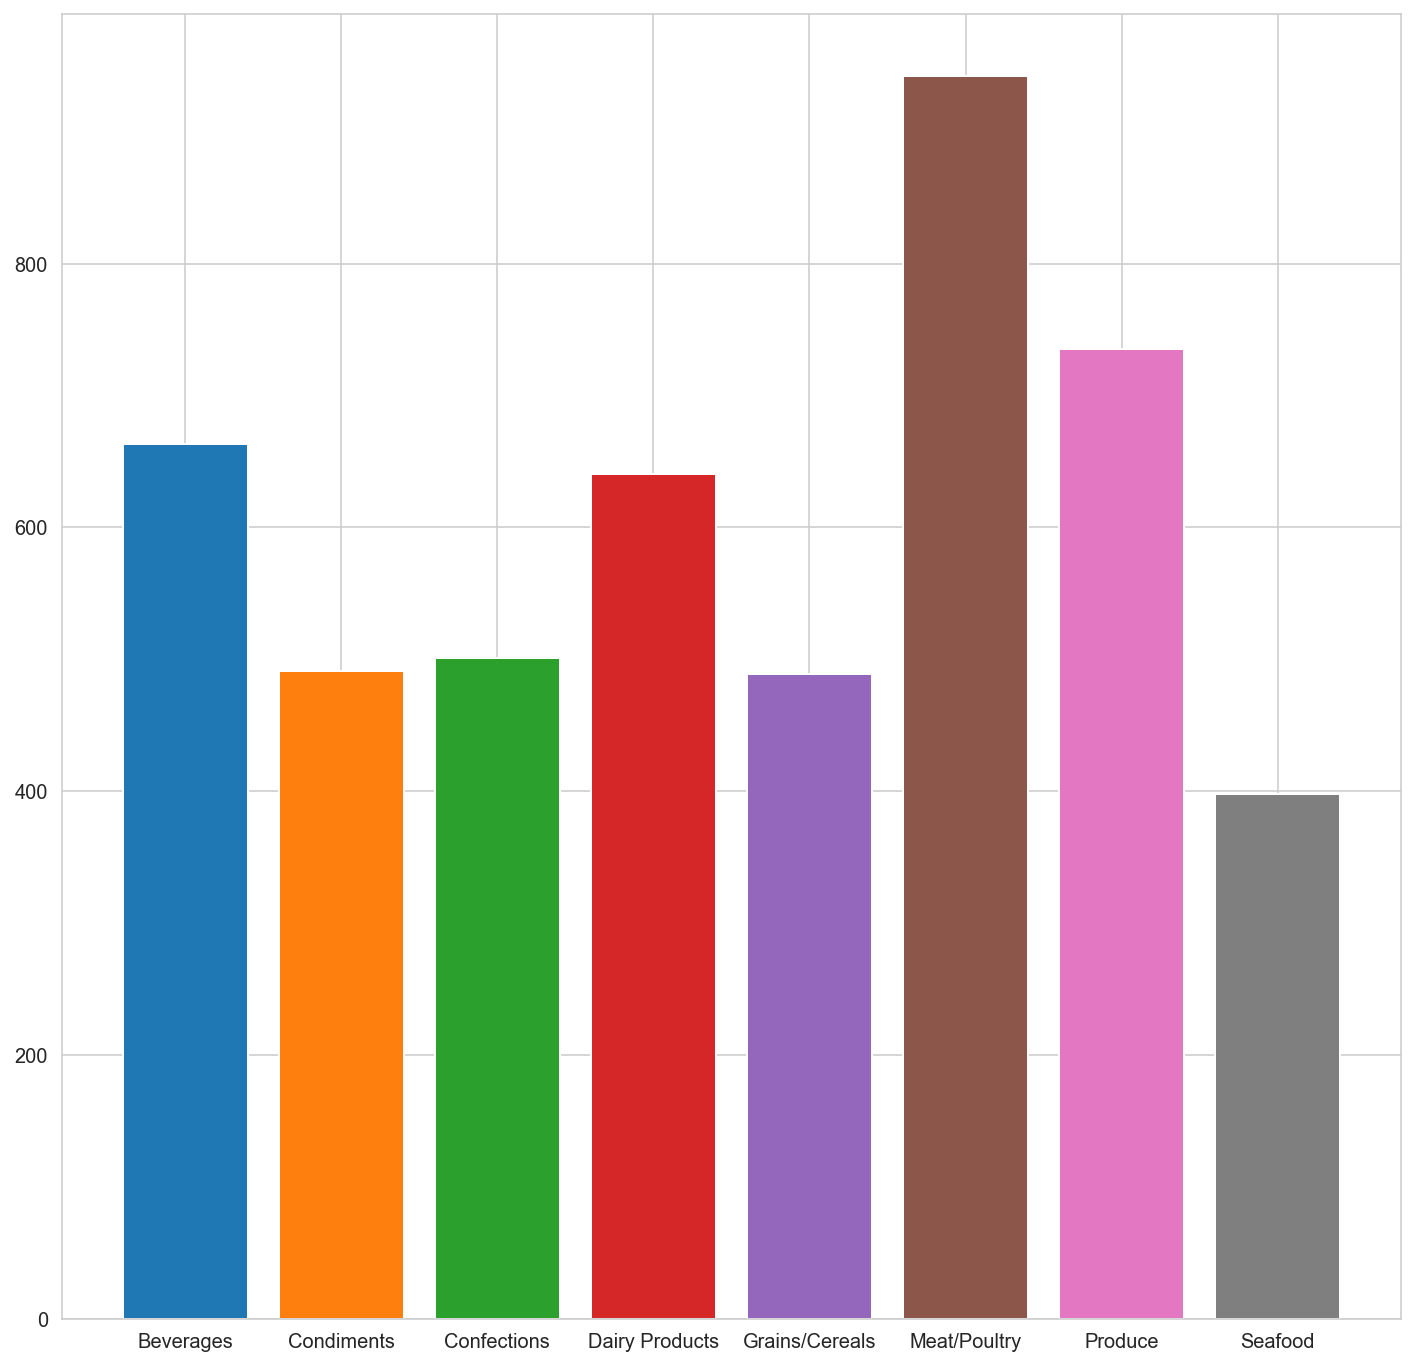

In [107]:
# plot revenue totals by category
fig = plt.figure(figsize=(12,12))
for k,v in rev_per_cat.items():
    plt.bar(x=k, height=v)

In [79]:
# What were the top 3 selling product categories in each region or country?
# What were the lowest 3 selling product categories in each region or country?